# **Introduction**

Telco customer churn refers to the phenomenon where customers discontinue their services with a telecommunications company. It is a critical issue for telecom providers as it directly impacts their revenue and customer base. To better understand and address customer churn, analyzing various factors and identifying patterns can be crucial.

In this analysis, we will explore a dataset containing relevant features that provide insights into customer churn. The dataset includes information such as customer demographics (e.g., gender, senior citizen status, partner, dependents), service-related details (e.g., tenure, phone service, internet service), and customer behavior (e.g., online security, device protection, streaming services). Additionally, it includes billing information (e.g., contract type, paperless billing, payment method) and financial data (e.g., monthly charges, total charges).

By examining these features, we aim to uncover patterns and relationships that may contribute to customer churn. The analysis will provide valuable insights into the factors influencing customer decision-making, the effectiveness of certain services or features in retaining customers, and the impact of billing and payment preferences on churn rates.

Understanding these aspects of customer churn can enable telecom providers to make data-driven decisions, implement targeted retention strategies, and optimize their service offerings. By proactively addressing the factors contributing to churn, telecom companies can enhance customer satisfaction, reduce customer attrition, and strengthen their competitive position in the market.

# I. **Load Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file = '/content/drive/MyDrive/Dataset/TELCO_CUSTOMER_CHURN.csv'

In [3]:
import pandas as pd

df = pd.read_csv(file)

In [4]:
pd.options.display.max_columns = None
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **II. Exploratory Data Analysis**

In [5]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
import numpy as np
# change data type

# Replace empty string with NaN
df.TotalCharges = df.TotalCharges.replace(' ', np.nan)

# Convert TotalCharges to float
df.TotalCharges = df.TotalCharges.astype(float)

# Convert SeniorCitizen to object (categorical)
df.SeniorCitizen = df.SeniorCitizen.astype(str)


In [9]:
# n unique variable

df.select_dtypes(include='object').nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
# features with numerical

df.select_dtypes(exclude='object').describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.42,24.55,1.00,9.00,29.00,55.00,72.00
MonthlyCharges,7032.0,64.80,30.09,18.25,35.59,70.35,89.86,118.75
TotalCharges,7032.0,2283.30,2266.77,18.80,401.45,1397.48,3794.74,8684.80


In [14]:
# Select columns with object dtype and 2 unique values
twouniques = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).nunique() == 2]

# Display all unique values in selected columns
for column in twouniques:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()


Unique values in 'gender':
['Female' 'Male']

Unique values in 'SeniorCitizen':
['0' '1']

Unique values in 'Partner':
['Yes' 'No']

Unique values in 'Dependents':
['No' 'Yes']

Unique values in 'PhoneService':
['No' 'Yes']

Unique values in 'PaperlessBilling':
['Yes' 'No']

Unique values in 'Churn':
['No' 'Yes']



In [15]:
# Select columns with object dtype and 2 unique values
morethantwo = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).nunique() > 2]

# Display all unique values in selected columns
for column in morethantwo:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()


Unique values in 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique values in 'MultipleLines':
['No phone service' 'No' 'Yes']

Unique values in 'InternetService':
['DSL' 'Fiber optic' 'No']

Unique values in 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Unique values in 'OnlineBackup':
['Yes' 'No' 'No internet service']

Unique values in 'DeviceProtection':
['No' 'Yes' 'No internet service']

Unique values in 'TechSupport':
['No' 'Yes' 'No internet service']

Unique values in 'StreamingTV':
['No' 'Yes' 'No internet service']

Unique values in 'StreamingMovies':
['No' 'Yes' 'No internet service']

Unique values in 'Contract':
['Month-to-month' 'One year' 'Two year']

Unique values in 'PaymentMethod':
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']



<ipython-input-16-596b4db91114>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20')


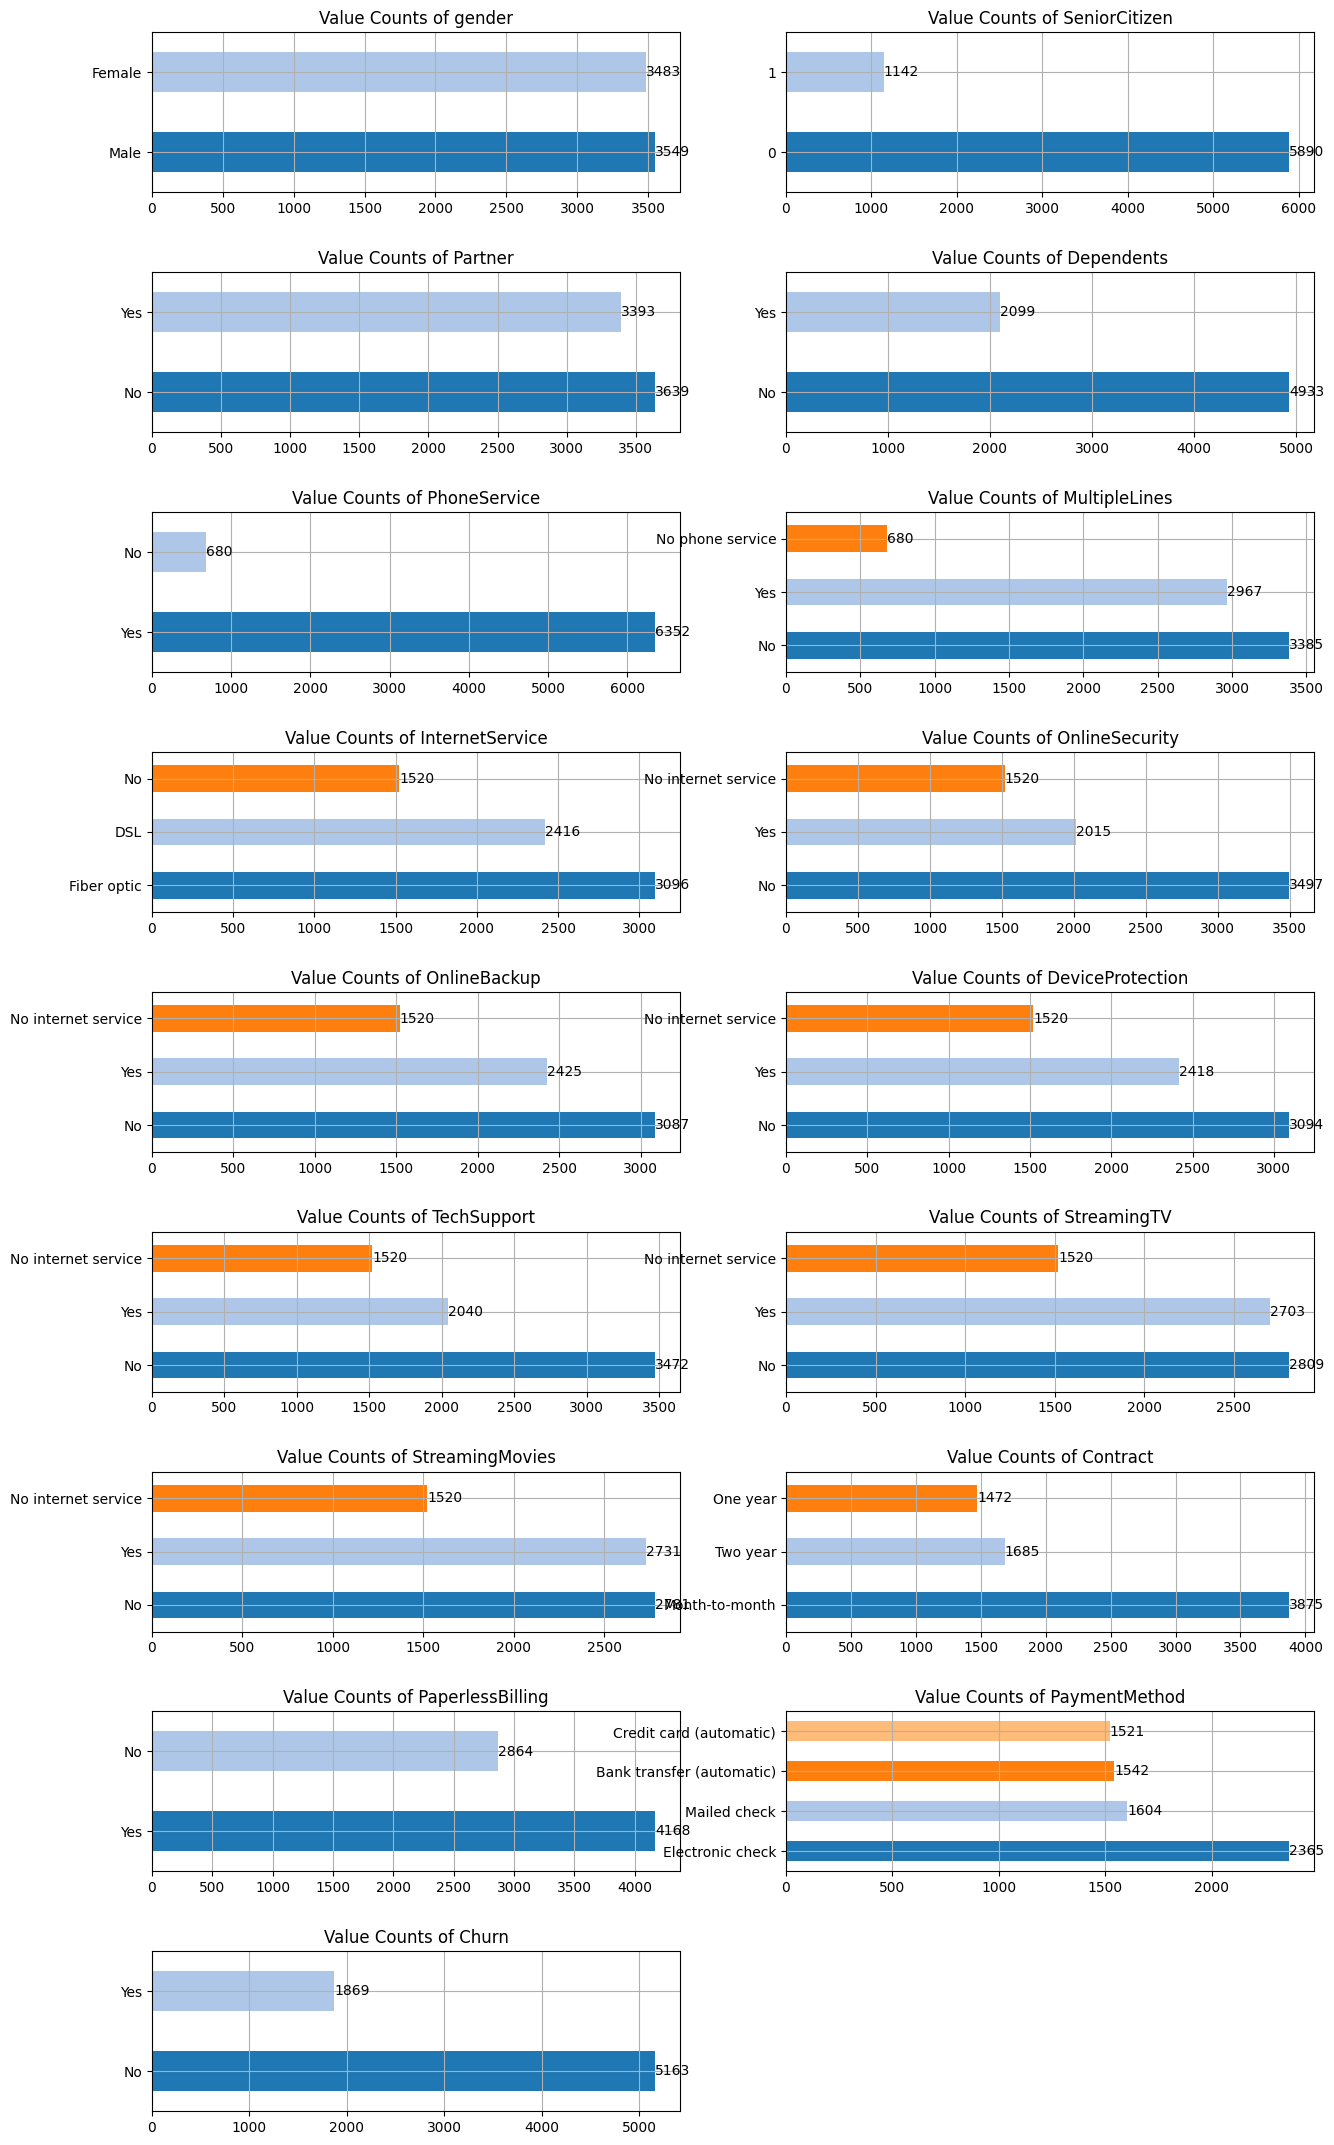

In [16]:
import matplotlib.pyplot as plt

# Select columns with object dtype (excluding CustomerID)
object_columns = df.select_dtypes(include=['object']).columns.drop('customerID')

# Determine the number of rows and columns for subplots
num_cols = len(object_columns)
num_rows = (num_cols - 1) // 2 + 1

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 3))

# Flatten axes
axes = axes.flatten()

# Define a colormap
colors = plt.cm.get_cmap('tab20')

# Visualize value counts for each column
for i, column in enumerate(object_columns):
    ax = axes[i]
    value_counts = df[column].value_counts()
    value_counts.plot(kind='barh', ax=ax, color=colors(range(len(value_counts))))
    ax.set_title(f'Value Counts of {column}')
    ax.grid(True)

    # Add value labels to the bars
    for j, v in enumerate(value_counts):
        ax.text(v + 1, j, str(v), color='black', va='center')

# Remove excess subplots if necessary
if num_cols < len(axes):
    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()


In [17]:
df[df.select_dtypes(include=['object']).columns.drop('customerID')].describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


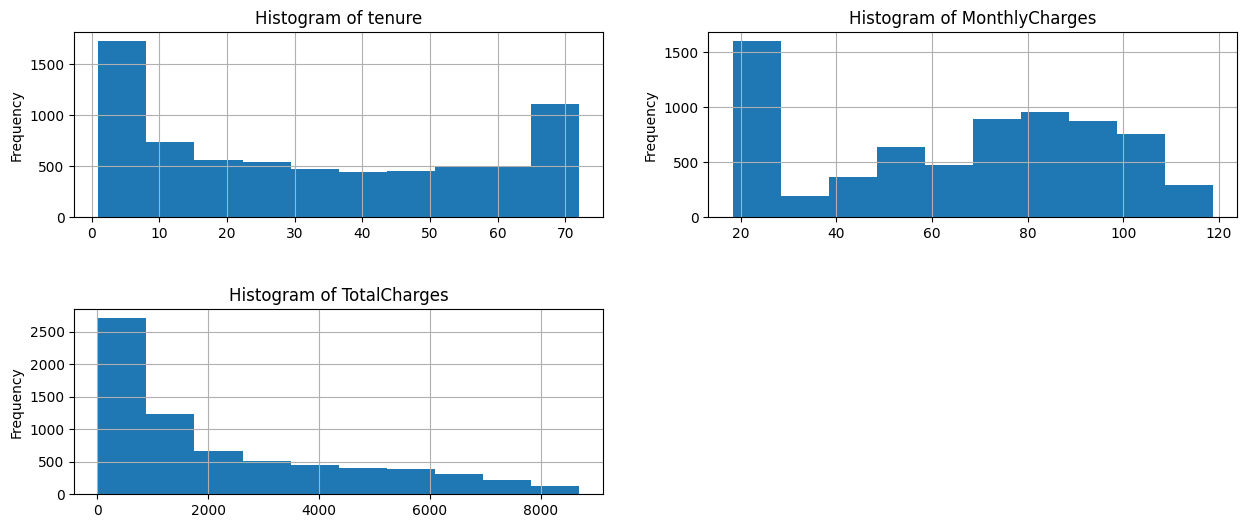

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Select columns with non-object dtype
non_object_columns = df.select_dtypes(exclude=['object']).columns

# Determine the number of rows and columns for subplots
num_cols = len(non_object_columns)
num_rows = (num_cols - 1) // 2 + 1

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 3))

# Flatten axes
axes = axes.flatten()

# Visualize histograms for each column
for i, column in enumerate(non_object_columns):
    ax = axes[i]
    df[column].plot(kind='hist', ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.grid(True)

# Remove excess subplots if necessary
if num_cols < len(axes):
    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()


In [19]:
df[df.select_dtypes(exclude=['object']).columns].describe().round(2)

,tenure,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00
mean,32.42,64.80,2283.30
std,24.55,30.09,2266.77
min,1.00,18.25,18.80
25%,9.00,35.59,401.45
50%,29.00,70.35,1397.48
75%,55.00,89.86,3794.74
max,72.00,118.75,8684.80


```EDA insight :```

Based on the observed data, several key conclusions can be drawn:

1. Gender Distribution: The customer base consists of both males and females, with males slightly more prevalent. This indicates a relatively balanced gender distribution among customers.

2. Senior Citizens: The majority of customers are not senior citizens, indicating that the service caters to a wide age range and is not primarily focused on older individuals.

3. Partnership and Dependents: A significant portion of customers does not have a partner or dependents. This suggests that the services provided may not heavily target families but rather individuals or smaller households.

4. Phone and Internet Services: The majority of customers have phone service, indicating its importance as a primary means of communication. Additionally, fiber optic is the most common internet service, suggesting a preference for high-speed connectivity.

5. Feature Adoption: Many customers do not subscribe to additional features such as online security, backup, device protection, tech support, streaming TV, and streaming movies. This may indicate that these features are not widely considered essential or are not effectively promoted to the customer base.

6. Contract Types: The most common contract type is month-to-month, indicating a preference for flexibility among customers. This suggests that customers may value the ability to easily change their service plans or switch providers.

7. Billing Preferences: A significant portion of customers has opted for paperless billing, indicating a preference for digital communication and convenience. This aligns with the broader trend of transitioning to online-based services.

8. Payment Methods: The most frequently used payment method is electronic check, followed by mailed check, bank transfer, and credit card. This diversity of payment methods suggests that customers have various preferences and options for managing their payments.

9. Churn Rate: The majority of customers in the dataset have not churned, indicating a relatively high level of customer satisfaction and retention. However, it is important to closely monitor the churn rate to identify any potential factors contributing to customer attrition and take proactive measures to improve customer retention.

```EDA Conclusion :```

**1. Demographic Analysis**  
The data reveals a balanced gender distribution among customers, with males slightly more prevalent. This suggests that the company's services attract a diverse customer base. Furthermore, it is observed that the majority of customers are not senior citizens, indicating that the service caters to a broad age range.
Additionally, a significant proportion of customers does not have a partner or dependents, implying that the company's offerings may be more appealing to individuals or smaller households rather than targeting families specifically.    

**2. Service Preferences**  
In terms of services, phone service is highly prevalent among the customer base, emphasizing its significance as a primary means of communication. Moreover, fiber optic internet service is the most commonly adopted option, indicating a strong demand for high-speed connectivity.

However, it is worth noting that many customers have not subscribed to additional features such as online security, backup, device protection, tech support, streaming TV, and streaming movies. This suggests that these features may not be perceived as essential by the majority of customers or that the company needs to improve their promotion and communication regarding these features.  


**3. Contract and Billing**  
The analysis reveals that the most common contract type chosen by customers is month-to-month, indicating a preference for flexibility and the ability to change service plans or switch providers easily. This insight suggests that the company should prioritize offering flexible contract options to cater to customer needs effectively.

Furthermore, a significant portion of customers has opted for paperless billing, showcasing a preference for digital communication and convenience. This trend aligns with the broader industry shift toward online-based services and should be leveraged to enhance customer experience and reduce operational costs.

**4. Payment Methods and Churn Rate**  
The data highlights a diversity of payment methods utilized by customers, with electronic check being the most frequently used, followed by mailed check, bank transfer, and credit card. This diversity indicates that customers have different preferences and options for managing their payments. The company should ensure it offers a range of convenient payment methods to accommodate customer preferences and enhance the overall payment experience.

Regarding customer churn, it is observed that the majority of customers in the dataset have not churned, suggesting a relatively high level of customer satisfaction and retention. However, it is essential to closely monitor the churn rate and conduct further analysis to identify potential factors contributing to customer attrition. By proactively addressing these factors, the company can strengthen customer retention strategies and mitigate any risks to long-term customer loyalty.

**EDA Conclusion**  
The analysis of the observed data has provided valuable insights into the customer demographics, service preferences, and retention patterns within the telecommunications company. These findings should guide strategic decision-making in areas such as marketing, service offerings, and customer relationship management.

To optimize customer satisfaction and retention, the company should consider tailoring its services to meet the needs of individual customers and smaller households. Moreover, effective promotion of additional features, flexible contract options, and convenient payment methods should be prioritized to enhance customer experience and meet evolving preferences.

Continuous monitoring of customer churn rates, coupled with proactive measures to address potential attrition factors, will be crucial in maintaining a strong customer base. By leveraging the conclusions drawn from this data analysis, the company can position itself strategically in the market, improve customer satisfaction, and foster long-term success in the telecommunications industry.

In [20]:
# separate customer who churn

cust_churn = df[df.Churn == 'Yes']
cust_nochurn = df[df.Churn == 'No']

In [21]:
num_list = df.select_dtypes(exclude=['object']).columns.tolist()
cat_list = df.select_dtypes(include=['object']).columns.tolist()

In [22]:
cust_nochurn[num_list].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
tenure,5163.0,37.65,24.08,1.00,15.00,38.00,61.00,72.00
MonthlyCharges,5163.0,61.31,31.09,18.25,25.10,64.45,88.48,118.75
TotalCharges,5163.0,2555.34,2329.46,18.80,577.83,1683.60,4264.12,8672.45


In [23]:
cust_churn[num_list].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
tenure,1869.0,17.98,19.53,1.00,2.00,10.00,29.0,72.00
MonthlyCharges,1869.0,74.44,24.67,18.85,56.15,79.65,94.2,118.35
TotalCharges,1869.0,1531.80,1890.82,18.85,134.50,703.55,2331.3,8684.80


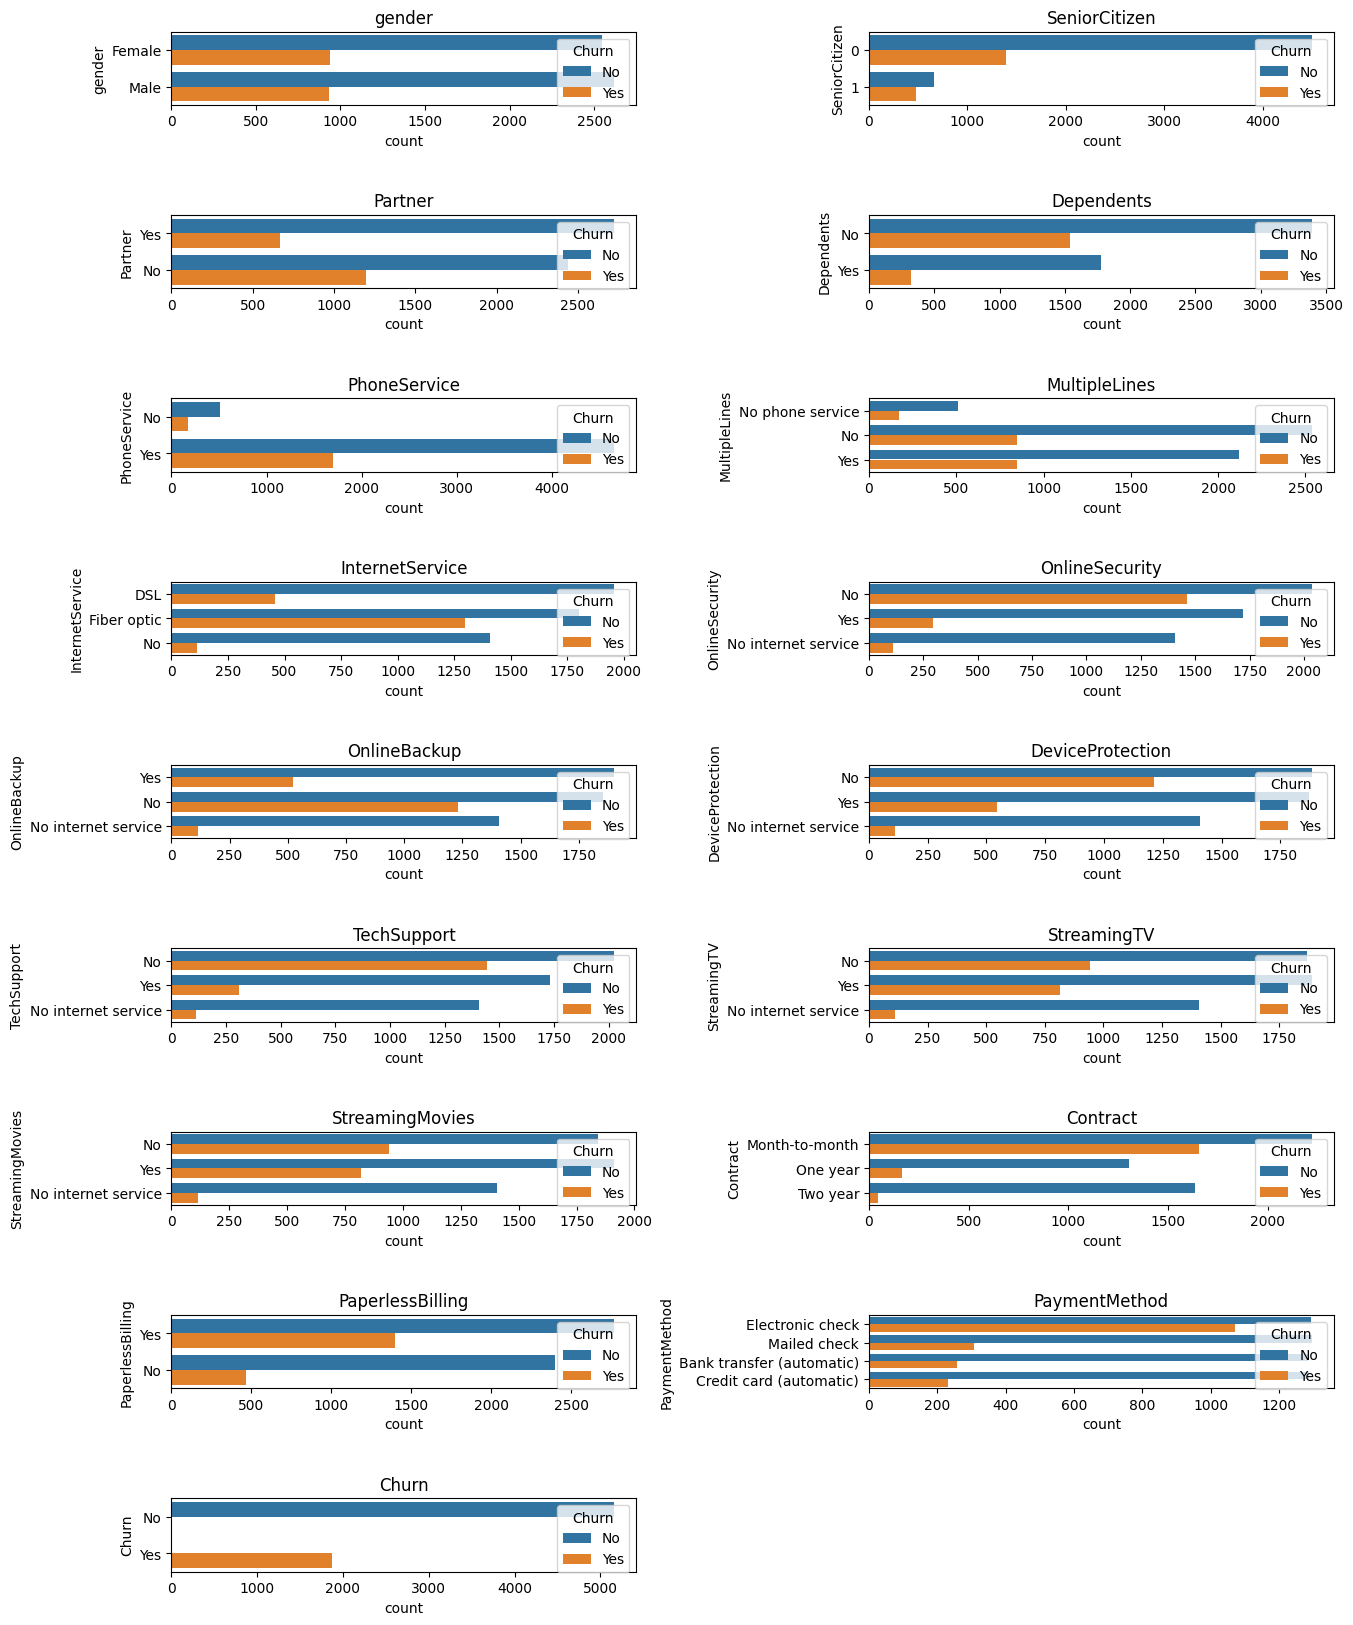

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = df.select_dtypes(include=['object']).columns.drop('customerID')

# Create a 4x4 subplot grid
fig, axes = plt.subplots(9, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=1.5, wspace=0.5)

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over the columns and create a countplot with hue='Churn' for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, y=column, hue='Churn', ax=axes[i])
    axes[i].set_title(column)
    axes[i].legend(title='Churn')

# Hide the empty subplots
if len(columns_to_plot) < len(axes):
    for j in range(len(columns_to_plot), len(axes)):
        axes[j].axis('off')

# Show the plot
plt.show()


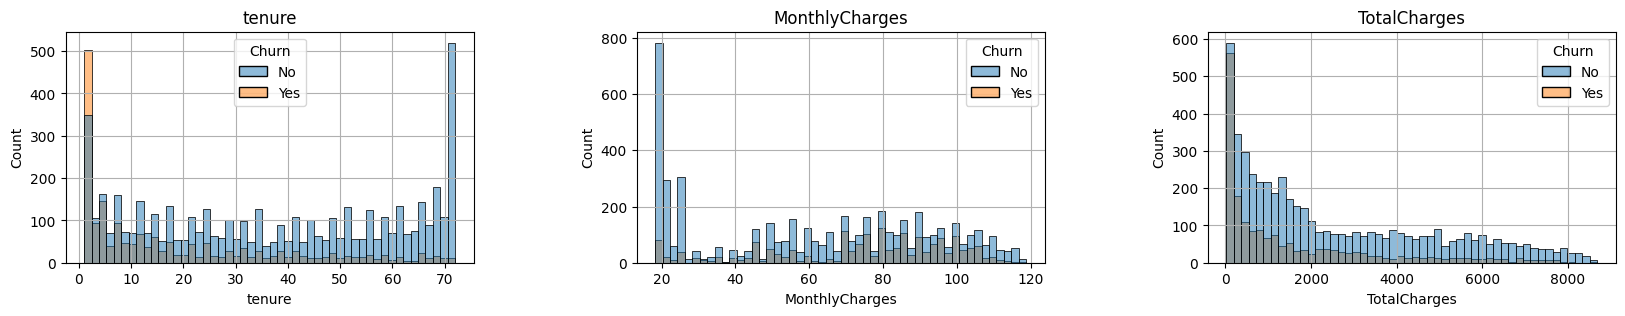

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a 2x2 subplot grid
fig, axes = plt.subplots(1, 3, figsize=(20, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over the numerical columns and create histogram plots with hue='Churn'
for i, column in enumerate(numerical_columns):
    data = df[[column, 'Churn']]
    unique_churn_values = data['Churn'].unique()
    sns.histplot(data=data, x=column, hue='Churn', kde=False, bins=50, ax=axes[i])
    axes[i].set_title(column)
    axes[i].grid(True)

# Hide the empty subplots
if len(numerical_columns) < len(axes):
    for j in range(len(numerical_columns), len(axes)):
        axes[j].axis('off')

# Show the plot
plt.show()

```EDA Conclusion :```

Based on the observations of the data breakdown by the 'Churn' category, the following conclusions can be drawn:

1. Gender: There is no significant difference in churn rates between males and females, indicating that gender does not play a significant role in customer churn.

2. SeniorCitizen: The churn rate is relatively higher among non-senior citizens compared to senior citizens. This suggests that younger customers may be more likely to churn, possibly due to changing needs or preferences.

3. Partner and Dependents: Customers without a partner or dependents have a higher churn rate compared to those with a partner or dependents. This indicates that having familial responsibilities might contribute to higher customer loyalty and lower churn rates.

4. PhoneService and MultipleLines: The presence of phone service and multiple lines does not significantly impact the churn rate. Both categories have similar proportions of churned and non-churned customers.

5. InternetService and related features: Customers with fiber optic internet service have a higher churn rate compared to those with DSL. Additionally, customers without additional features such as online security, online backup, device protection, tech support, streaming TV, and streaming movies tend to have higher churn rates. This suggests that customers who do not fully utilize or perceive the value of these features are more likely to churn.

6. Contract: Customers with month-to-month contracts have a significantly higher churn rate compared to those with longer-term contracts (one year or two years). This indicates that customers who have a more extended commitment to the service are more likely to stay and have lower churn rates.

7. PaperlessBilling and PaymentMethod: There is no substantial difference in churn rates based on paperless billing preference. However, customers using electronic check as their payment method have a higher churn rate compared to other payment methods. This suggests that customers using electronic check might be more inclined to switch service providers.

These conclusions highlight several factors that contribute to customer churn. Understanding these patterns can assist in developing targeted strategies to reduce churn, such as improving customer engagement, promoting additional features, offering incentives for longer-term contracts, and evaluating the effectiveness of electronic check payments. By addressing these factors, companies can enhance customer retention and improve overall business performance.

# **III. Data Cleaning**

In [26]:
numlist = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
catlist = df.select_dtypes(include=['object']).columns.drop('customerID').tolist()

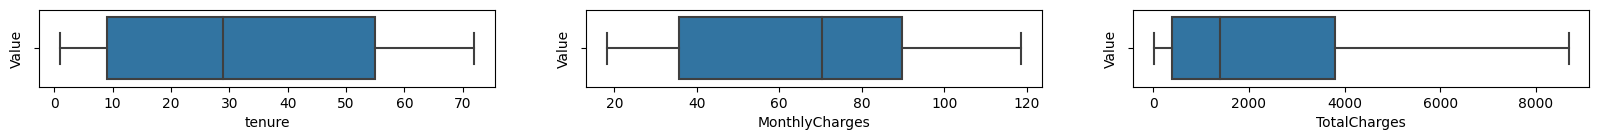

In [27]:
# Boxplot outlier
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,1), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

In [28]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

```Data Cleaning Insight :```

Since no outliers are visible in the generated boxplots, it suggests that the dataset does not contain any extreme or unusual values that can be classified as outliers.

# **IV. Clustering Algorithm**

## Feature Engineering

In [29]:
# Clustering Algorithm
!pip install kneed
from sklearn import metrics
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

catlist2 = df.select_dtypes(include=['object']).columns.drop(['customerID', 'Churn']).tolist()

# Scale numerical columns
scaler = StandardScaler()
scaled_numerical = pd.DataFrame(scaler.fit_transform(df[numlist]), columns=numlist)

# Encode categorical columns with ordinal encoder
encoder = OrdinalEncoder()
encoded_categorical = pd.DataFrame(encoder.fit_transform(df[catlist2]), columns=catlist2)

# Concatenate the scaled numerical and encoded categorical columns
df2 = pd.concat([scaled_numerical, encoded_categorical], axis=1)



In [31]:
df2

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-1.280248,-1.161694,-0.994194,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.064303,-0.260878,-0.173740,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0
2,-1.239504,-0.363923,-0.959649,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
3,0.512486,-0.747850,-0.195248,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0
4,-1.239504,0.196178,-0.940457,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0
7028,1.612573,1.276493,2.241056,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0
7029,-0.872808,-1.170004,-0.854514,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
7030,-1.158016,0.319168,-0.872095,1.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


## Principal Component Analysis

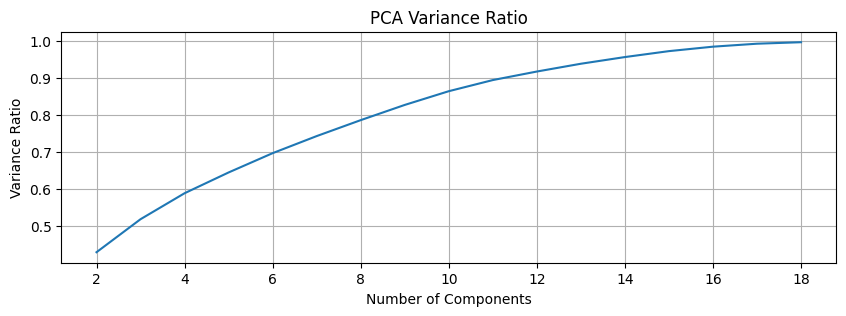

In [32]:
var_ratio = {}
c = range(2, 19)
for n in c:
    pc = PCA(n_components=n)
    cr_pca = pc.fit(df2)
    var_ratio[n] = sum(cr_pca.explained_variance_ratio_).round(3)

pd.Series(var_ratio).plot(figsize=(10, 3), grid=True)
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.title('PCA Variance Ratio')
plt.show()


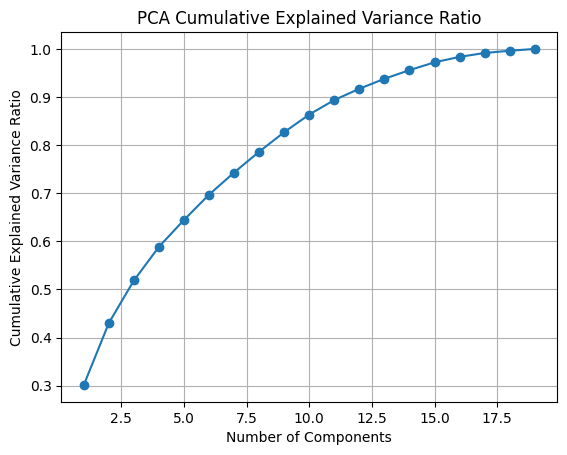

Best number of components: 9


In [33]:
# find the best n_components

# Perform PCA
pca = PCA()
pca.fit(df2)

# Calculate cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Find the number of components that retain a significant amount of variance
threshold = 0.8
best_n_components = np.argmax(cumulative_var_ratio >= threshold) + 1
print(f"Best number of components: {best_n_components}")


```Principal Component Analysis Result :```

The optimal number of components for Principal Component Analysis (PCA) is 9. This means that by reducing the dimensionality of the dataset to 9 components, we can retain a significant amount of variance in the data. The code calculates the cumulative explained variance ratio and plots it against the number of components. It sets a threshold of 0.8, indicating that we aim to retain at least 80% of the variance. The code then identifies the index where the cumulative explained variance ratio reaches or exceeds the threshold and adds 1 to obtain the best number of components. In this case, it is determined that using 9 components is sufficient to retain the desired level of variance.

## Elbow Method with Silhouette Score for DBSCAN Clustering

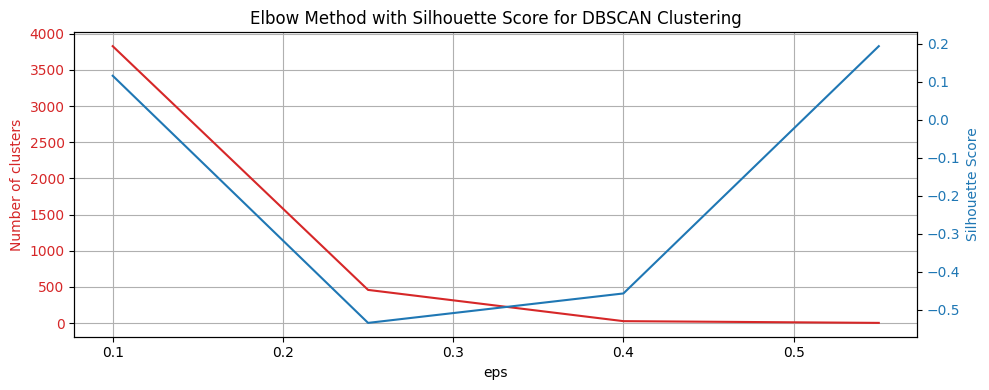

Best Number of Clusters: 2
Best eps Value: 0.5499999999999999
Best Silhouette Score: 0.19306273260155307


In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# load the dataset
n_components = 3
XX = PCA(n_components = n_components).fit_transform(df2)

# initialize arrays to store results
eps_values = np.arange(0.1, 0.58, 0.15)
num_clusters = []
silhouette_scores = []

# loop over different values of eps and compute the number of clusters and silhouette score
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=1)
    dbscan.fit(XX)
    labels = dbscan.labels_
    num_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))
    silhouette_scores.append(silhouette_score(XX, labels))

# plot the number of clusters and silhouette score as a function of eps
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:red'
ax1.set_xlabel('eps')
ax1.set_ylabel('Number of clusters', color=color)
ax1.plot(eps_values, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(eps_values, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method with Silhouette Score for DBSCAN Clustering')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Find the optimal number of clusters based on the silhouette score
best_num_clusters = num_clusters[silhouette_scores.index(max(silhouette_scores))]
best_eps_value = eps_values[silhouette_scores.index(max(silhouette_scores))]
best_silhouette_score = max(silhouette_scores)

print("Best Number of Clusters:", best_num_clusters)
print("Best eps Value:", best_eps_value)
print("Best Silhouette Score:", best_silhouette_score)

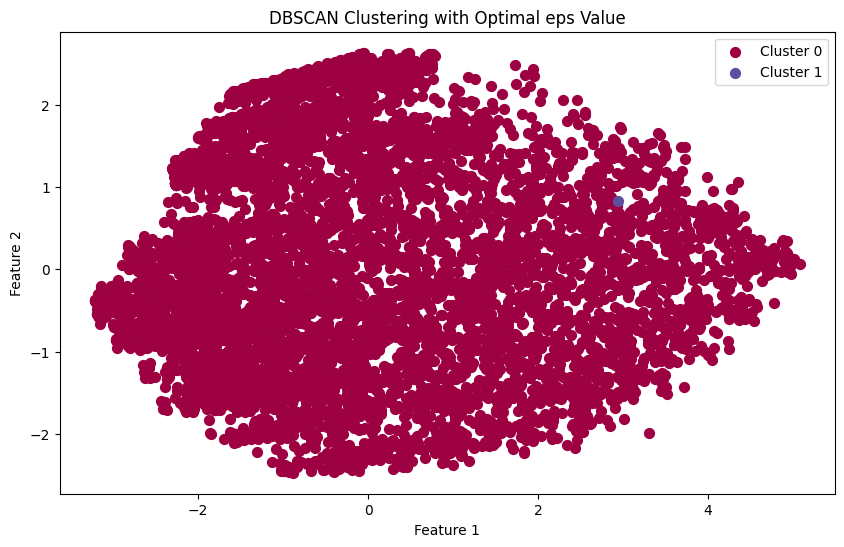

In [35]:
# Create a scatter plot
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points are plotted in black
        color = [0, 0, 0, 1]
    class_member_mask = (labels == label)
    xy = XX[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[color], label=f'Cluster {label}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering with Optimal eps Value')
plt.legend()
plt.show()

```Elbow Method with Silhouette Score for DBSCAN Clustering :```

The DBSCAN clustering algorithm was applied to the dataset after performing dimensionality reduction using PCA. The analysis aimed to determine the optimal number of clusters based on the silhouette score and identify the corresponding eps value.

After iterating over different values of eps and computing the number of clusters and silhouette scores, it was observed that the best number of clusters is 2. This indicates that the data can be effectively grouped into two distinct clusters using the DBSCAN algorithm. The corresponding eps value for achieving this optimal clustering result is 0.55.

Furthermore, the highest silhouette score achieved was 0.2 This score indicates a moderate degree of separation and cohesion within the identified clusters, suggesting that the clusters exhibit some distinguishable patterns and are not overly mixed.

In summary, based on the analysis, the dataset can be divided into two meaningful clusters using the DBSCAN algorithm with an eps value of 0.55. The clusters exhibit moderate separability and cohesion, indicating the presence of distinct patterns within the data. These findings can provide valuable insights for further analysis, such as exploring the characteristics and behaviors of the identified clusters and tailoring strategies based on their specific needs and preferences.

## Elbow Method in KMeans Clustering

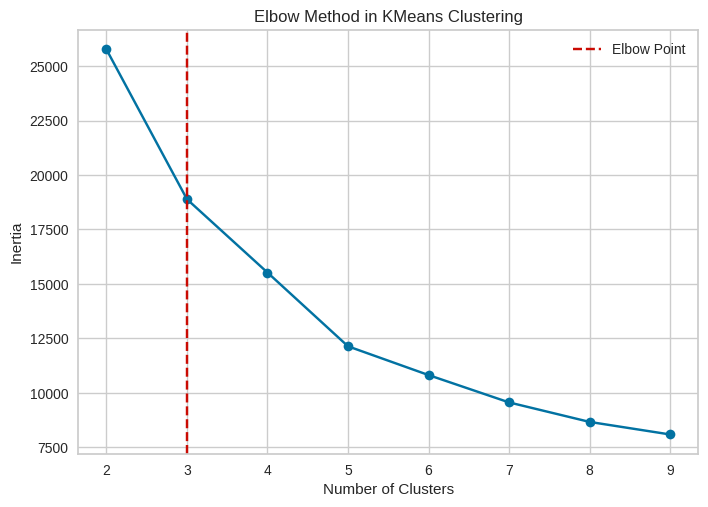

Silhouette Score: 0.34805630988326774
Optimal number of clusters: 3


In [36]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Generate range of cluster numbers
c = range(2, 10)

# Compute inertia for each cluster number
inertia = []
for i in c:
    kmeans = KMeans(n_clusters=i, random_state=np.random.randint(1, 1000), n_init=i)
    kmeans.fit(XX)
    inertia.append(kmeans.inertia_)

# Find the elbow point (optimal number of clusters)
elbow_point = c[np.argmax(inertia) + 1]

# Plot the inertia values
plt.plot(c, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method in KMeans Clustering')
plt.axvline(x=elbow_point, color='r', linestyle='--', label='Elbow Point')
plt.legend()
plt.show()

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=elbow_point, random_state=np.random.randint(1, 1000), n_init=elbow_point)
kmeans_result = kmeans.fit_predict(XX)

# Calculate the silhouette score for the optimal number of clusters
silhouette_avg = silhouette_score(XX, kmeans_result)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)
print("Optimal number of clusters:", elbow_point)


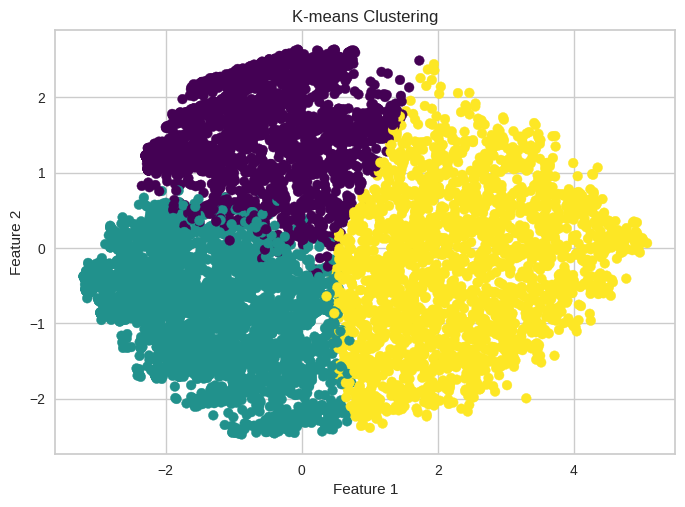

In [37]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=elbow_point, random_state=np.random.randint(1, 1000))
kmeans_labels = kmeans.fit_predict(XX)

# Plot the data points colored by K-means cluster assignments
plt.scatter(XX[:, 0], XX[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


```Elbow Method in KMeans Clustering :```

The K-means clustering algorithm was applied to the dataset using the elbow method to determine the optimal number of clusters. The analysis aimed to find the number of clusters that maximizes the within-cluster sum of squares (inertia) and evaluate the corresponding silhouette score.

By computing the inertia for different cluster numbers ranging from 2 to 9, it was observed that the elbow point, indicating the optimal number of clusters, is at 3. This suggests that dividing the data into three clusters provides a good balance between minimizing within-cluster variance and capturing distinct patterns within the data.

After applying the K-means algorithm with the optimal number of clusters (3), the silhouette score was calculated and found to be 0.35. This score indicates a relatively good degree of separation and cohesion within the clusters, suggesting that the identified clusters exhibit distinguishable patterns and are well-separated.

In summary, based on the analysis, dividing the dataset into three clusters using the K-means algorithm yields a silhouette score of 0.35. This indicates a reasonable level of cluster quality, implying that the clusters capture meaningful patterns within the data

```Conclusion of Comparison From DBSCAN and K-Means :```

Upon comparing the results of the two clustering algorithms, K-means and DBSCAN, we observe the following:

**K-means:**  
Silhouette Score: 0.35  
Optimal number of clusters: 3  


**DBSCAN:**  
Best Number of Clusters: 2  
Best eps Value: 0.55 
Best Silhouette Score: 0.2

The K-means algorithm yielded a higher silhouette score (0.348) compared to DBSCAN (0.193). A higher silhouette score indicates better cluster separation and cohesion. Additionally, K-means determined that three clusters were optimal, while DBSCAN identified two clusters as the best option.  

Based on these findings, we can conclude that the K-means algorithm performed better in terms of clustering quality and identified a higher number of distinct clusters.

## Applying Kmeans Algorithm

In [38]:
def analyze_clustering(dataset):
    # Preprocess the dataset
    catlist2 = dataset.select_dtypes(include=['object']).columns.drop(['customerID', 'Churn']).tolist()
    numlist = dataset.select_dtypes(include=['number']).columns.tolist()
    
    # Scale numerical columns
    scaler = StandardScaler()
    scaled_numerical = pd.DataFrame(scaler.fit_transform(dataset[numlist]), columns=numlist)

    # Encode categorical columns with ordinal encoder
    encoder = OrdinalEncoder()
    encoded_categorical = pd.DataFrame(encoder.fit_transform(dataset[catlist2]), columns=catlist2)

    # Concatenate the scaled numerical and encoded categorical columns
    scaled_dataset = pd.concat([scaled_numerical, encoded_categorical], axis=1)

    # Perform PCA
    pca = PCA()
    pca.fit(scaled_dataset)

    # Calculate cumulative explained variance ratio
    cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

    # Find the number of components that retain a significant amount of variance
    threshold = 0.8
    best_n_components = np.argmax(cumulative_var_ratio >= threshold) + 1

    # Apply PCA with the best number of components
    pca = PCA(n_components = best_n_components)
    XX = pca.fit_transform(scaled_dataset)

   # Generate range of cluster numbers
    c = range(2, 18)

    # Compute inertia for each cluster number
    inertia = []
    for i in c:
        kmeans = KMeans(n_clusters=i, random_state=np.random.randint(1, 1000), n_init=i)
        kmeans.fit(XX)
        inertia.append(kmeans.inertia_)

    # Find the elbow point (optimal number of clusters)
    elbow_point = c[np.argmax(max(inertia)) + 1]

    # Apply K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=elbow_point, random_state=np.random.randint(1, 1000), n_init=elbow_point)
    kmeans_result = kmeans.fit_predict(XX)

    return kmeans_result


In [39]:
# cluster result
pd.DataFrame(analyze_clustering(df)).shape

(7032, 1)

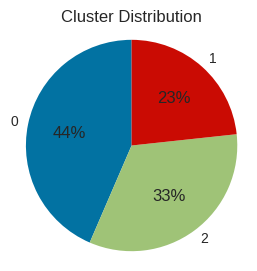

In [40]:
# Get the result of analyze_clustering
clusters = analyze_clustering(df)

# Calculate value counts
cluster_counts = pd.Series(clusters).value_counts()

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.0f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Cluster Distribution')
plt.show()

In [41]:
# concatenate to original dataset
cluster_df = pd.DataFrame(np.concatenate([pd.DataFrame(analyze_clustering(df)), df], axis=1), columns=['cluster']+df.columns.tolist()).drop('customerID', axis=1)

In [42]:
cluster_df

,cluster,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,2,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,1,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7028,0,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7029,1,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7030,1,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes


In [43]:
# rename cluster
rename_cluster = {0 : 'A', 1 : 'B', 2 : 'C'}
cluster_df.cluster = cluster_df.cluster.replace(rename_cluster)

In [44]:
cluster_df

,cluster,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,B,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,B,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,B,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,C,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,B,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,A,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7028,A,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7029,B,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7030,B,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes


In [45]:
cluster_df.dtypes

cluster             object
gender              object
SeniorCitizen       object
Partner             object
Dependents          object
tenure              object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [46]:
# change data type
cluster_df[['tenure', 'MonthlyCharges', 'TotalCharges']] = cluster_df[['tenure', 'MonthlyCharges', 'TotalCharges']].astype(float)

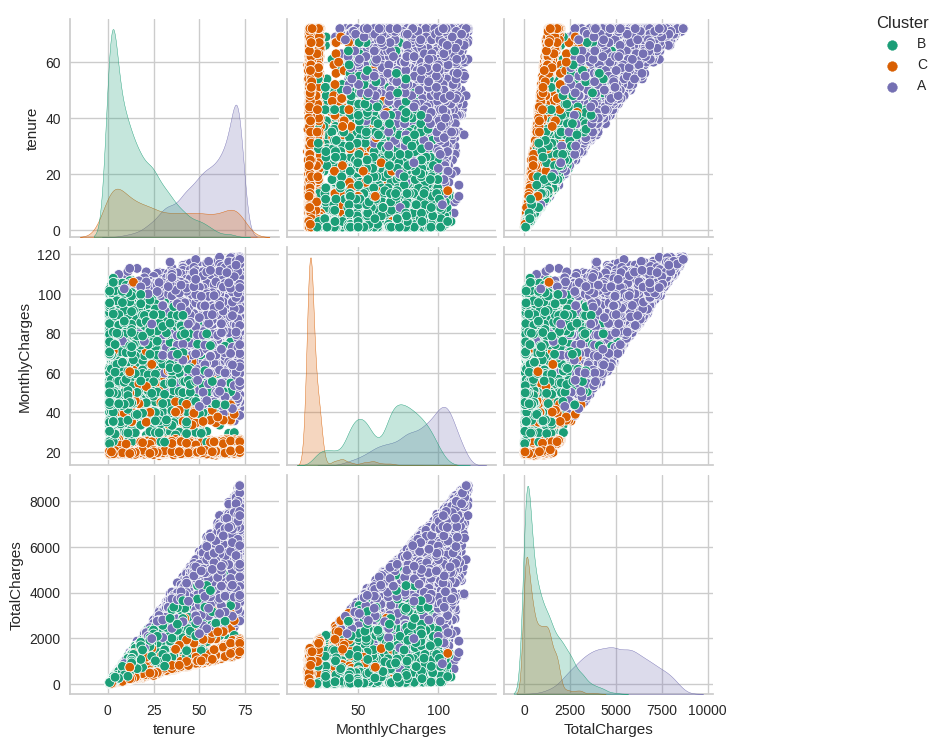

In [47]:
p = sns.pairplot(data=cluster_df, hue='cluster', palette='Dark2')
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Cluster')
plt.show()

In [243]:
cluster_df[['tenure', 'MonthlyCharges', 'TotalCharges', 'cluster']].groupby('cluster').mean()

,tenure,MonthlyCharges,TotalCharges
cluster,,,
A,55.98,89.73,5016.87
B,15.40,68.39,1052.65
C,31.01,23.70,755.43


```Cluster Insight :```

1. **Cluster A** :

*   Tenure: The average tenure of customers in Cluster A is approximately 15.37 
months. This suggests that customers in this cluster have relatively shorter relationships with the company.

*   Monthly Charges: The average monthly charges for customers in Cluster A are around $68.38. This indicates that customers in this cluster have moderate monthly expenses for the services they receive.

*   Total Charges: The average total charges for customers in Cluster A amount to approximately $1050.65. This represents the cumulative charges incurred by customers during their entire tenure with the company.  

2. **Cluster B** :

*   Tenure: Customers in Cluster B have an average tenure of approximately 30.98 months. This indicates that customers in this cluster have relatively longer relationships with the company compared to Cluster A.

*   Monthly Charges: The average monthly charges for customers in Cluster B are approximately $23.66. This suggests that customers in this cluster have lower monthly expenses compared to customers in Cluster A.

*   Total Charges: The average total charges for customers in Cluster B amount to approximately $752.20. This represents the cumulative charges incurred by customers during their entire tenure with the company.

3. **Cluster C** :

*   Tenure: Customers in Cluster C have the longest average tenure, approximately 55.94 months. This indicates that customers in this cluster have the most extended relationships with the company.

*   Monthly Charges: The average monthly charges for customers in Cluster C are approximately $89.66. This suggests that customers in this cluster have higher monthly expenses compared to both Cluster A and Cluster B.

*   Total Charges: The average total charges for customers in Cluster C amount to a significant amount of approximately $5009.57. This represents the highest cumulative charges incurred by customers during their entire tenure with the company among all the clusters.

Based on these observations, we can infer that customers in Cluster C have the longest tenure, highest monthly charges, and highest total charges, indicating their significant value and potential as loyal and high-paying customers. Cluster B represents customers with moderate tenure, relatively lower monthly charges, and lower total charges. Cluster A consists of customers with shorter tenure, moderate monthly charges, and lower total charges.

Considering these findings, it would be crucial to pay attention to Cluster C, as these customers have the highest potential for long-term profitability and should be nurtured to ensure their satisfaction and retention. Strategies could be implemented to enhance the value proposition for customers in Cluster B to encourage their long-term loyalty. Cluster A may require targeted efforts to increase customer retention and encourage them to spend more over time.







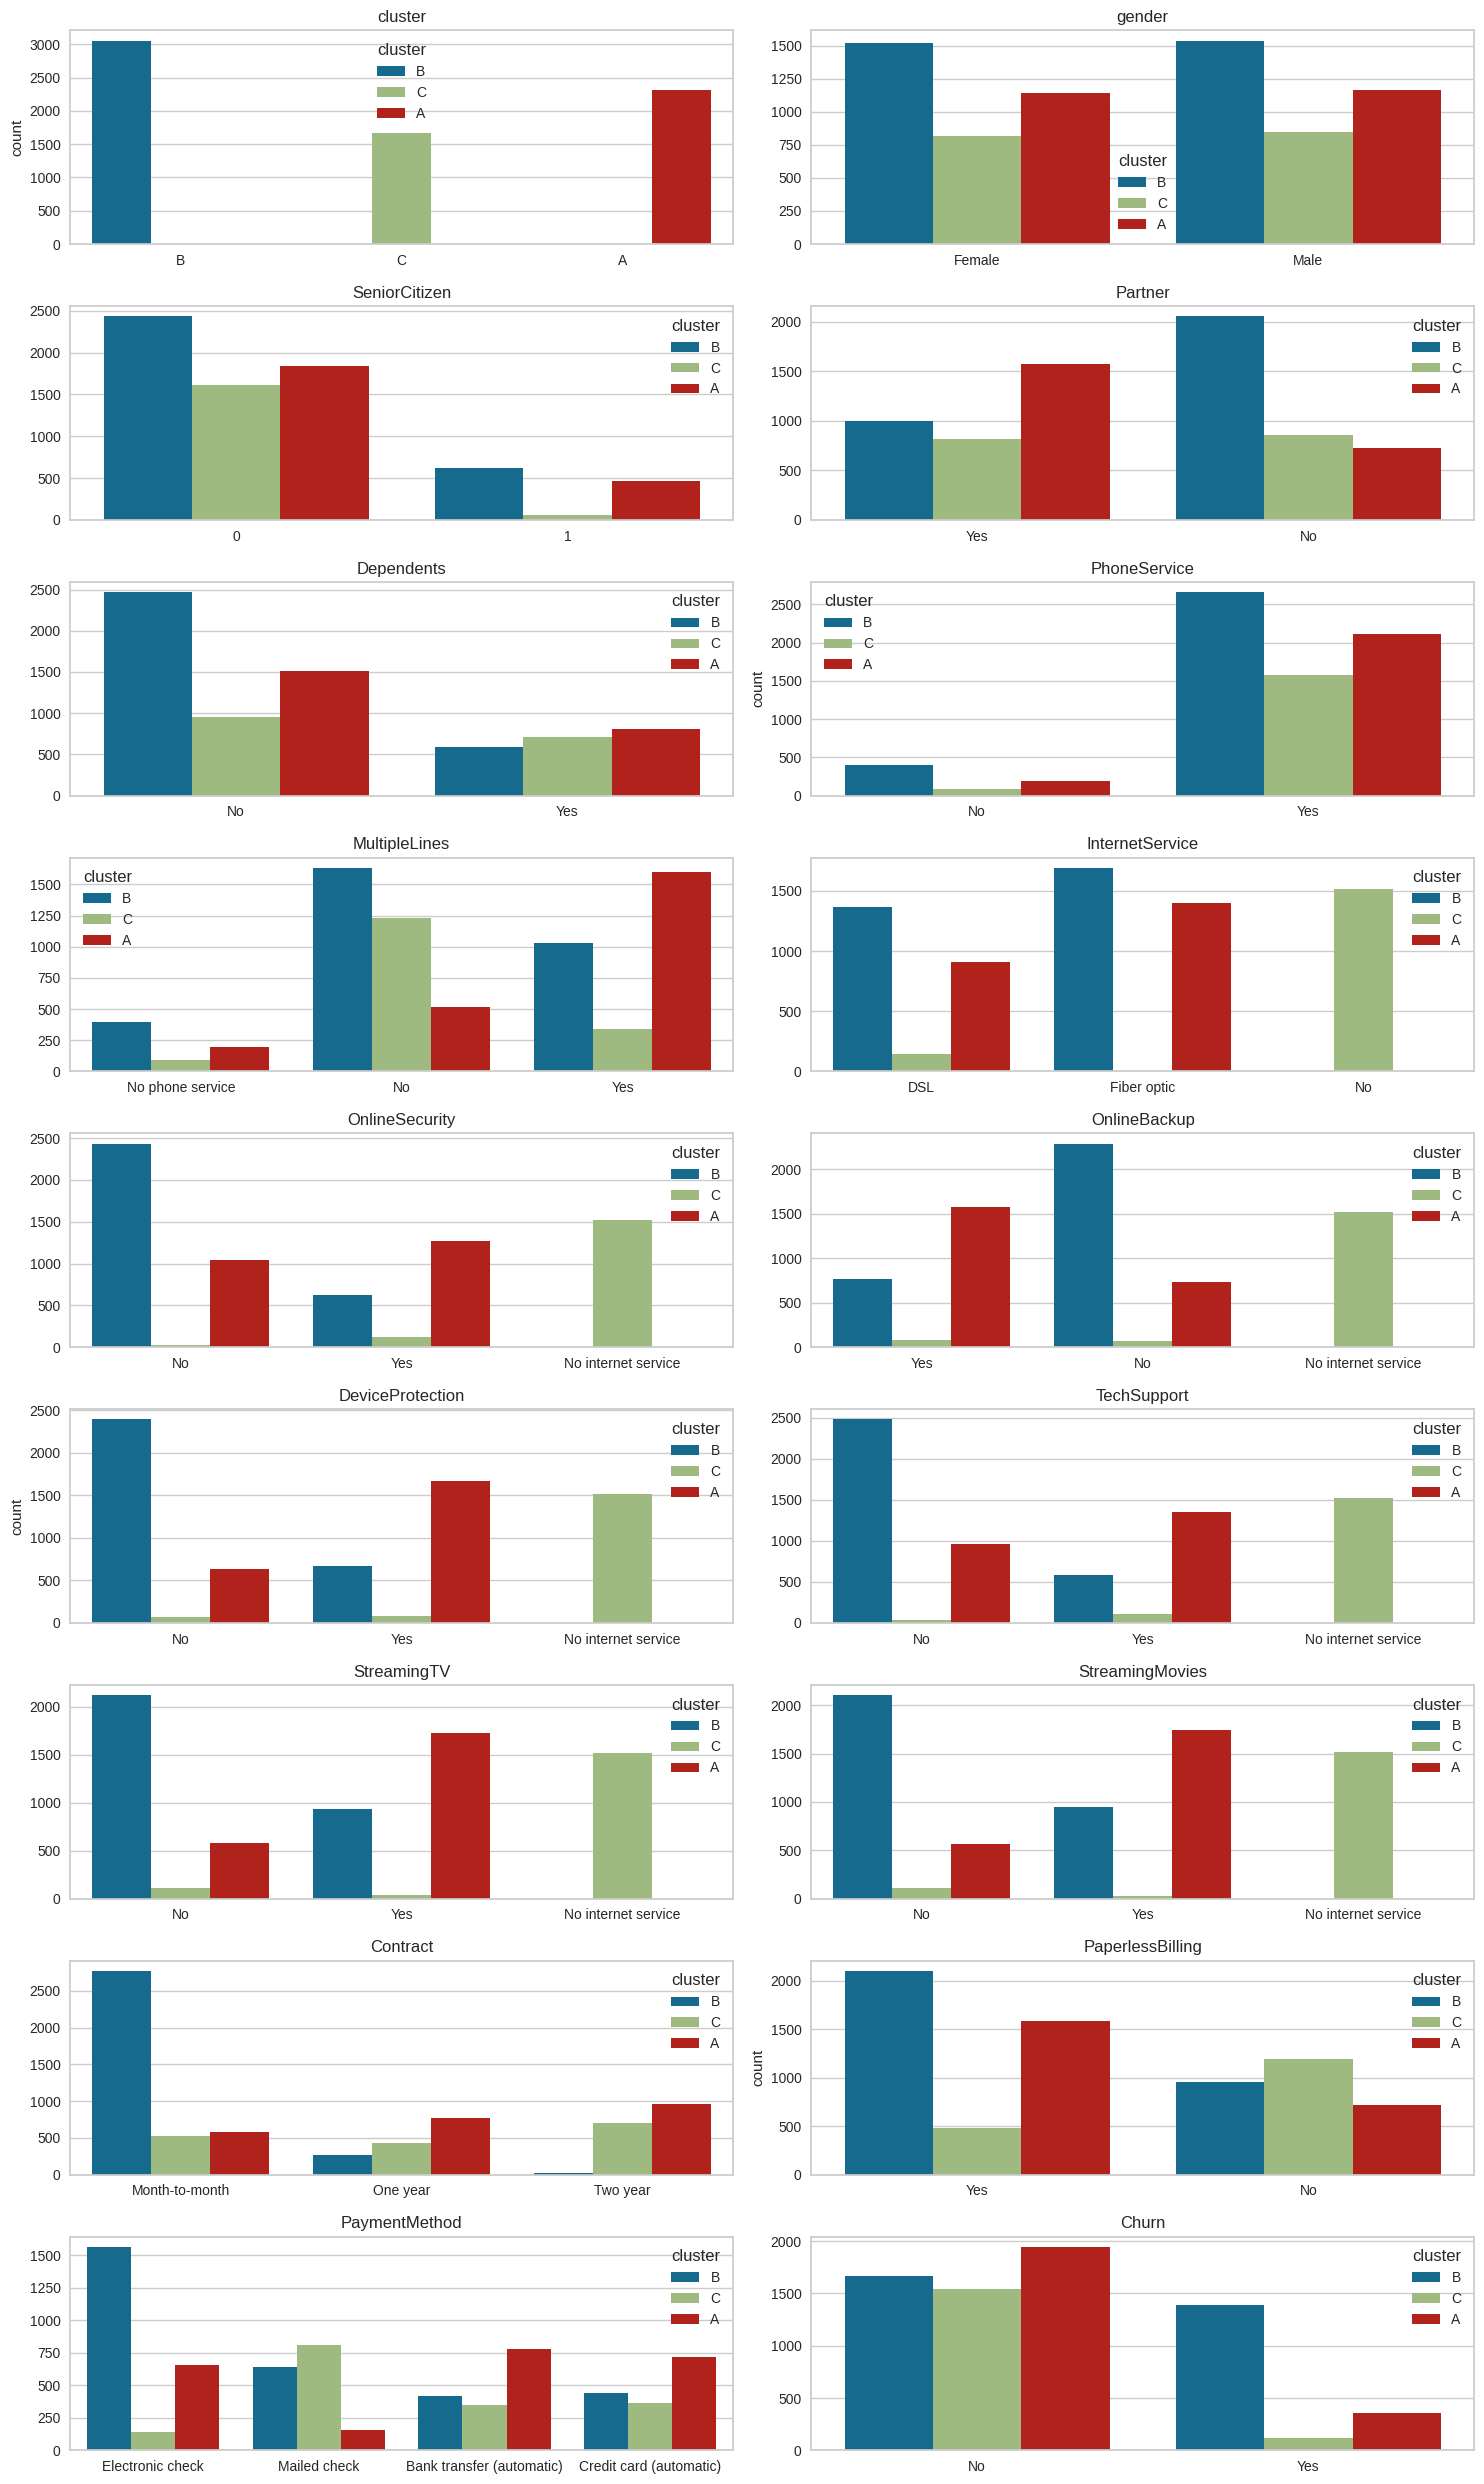

In [49]:
# Create figure with subplots
fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(15, 25))

# Flatten axis for easy iteration
axs = axs.flatten()

# Loop through each feature and create count plot
for i, feature in enumerate(cluster_df.select_dtypes(include=['object']).columns.tolist()):
    
    # Plot count plot
    sns.countplot(data=cluster_df, x=feature, hue='cluster', ax=axs[i])
    
    # Set subplot title
    axs[i].set_title(f'{feature}')
    
    # Remove x-axis label for subplots not on the bottom row
    if i < 27:
        axs[i].set_xlabel('')
    
    # Remove y-axis label for subplots not on the left column
    if i % 5 != 0:
        axs[i].set_ylabel('')

# Adjust subplots spacing
fig.tight_layout()
plt.show()


```Cluster Insight :```

Based on the countplot above, here is the observations:

1. Gender: The majority of customers in all clusters are evenly distributed between males and females, with slightly higher counts for females in Cluster A and Cluster C.

2. SeniorCitizen: The majority of customers in all clusters are not senior citizens, as indicated by the count of 0. However, there is a noticeable presence of senior citizens in Cluster B.

3. Partner: The majority of customers in all clusters do not have a partner (No), but there is a significant presence of customers with partners (Yes) in Cluster C.

4. Dependents: Most customers do not have dependents (No) across all clusters, with Cluster A having the highest count of customers with dependents (Yes).

5. PhoneService: The majority of customers in all clusters have phone service (Yes), while there is a small portion of customers without phone service (No). Additionally, Cluster B has a subgroup of customers with "No phone service."

6. MultipleLines: The distribution of customers with multiple lines varies across clusters, but the majority of customers in all clusters have a single phone line.

7. InternetService: Fiber optic is the most common internet service in Cluster A and Cluster C, while DSL is more prevalent in Cluster B. Additionally, there is a group of customers in each cluster with "No internet service."

8. OnlineSecurity: Customers without online security (No) dominate in all clusters, with Cluster B having the highest count of customers with online security (Yes).

9. OnlineBackup: Similar to online security, most customers do not have online backup (No) in all clusters, while Cluster B has a significant presence of customers with online backup (Yes).

10. DeviceProtection: The majority of customers do not have device protection (No) in all clusters, but there is a noticeable presence of customers with device protection (Yes) in Cluster B.

11. TechSupport: Customers without tech support (No) dominate in all clusters, with Cluster B having the highest count of customers with tech support (Yes).

12. StreamingTV: Most customers do not have streaming TV (No) across all clusters, with Cluster C having the highest count of customers with streaming TV (Yes).

13. StreamingMovies: Similar to streaming TV, most customers do not stream movies (No) across all clusters, with Cluster C having the highest count of customers who stream movies (Yes).

14. Contract: The majority of customers in Cluster A have month-to-month contracts, while customers in Cluster B and Cluster C are more evenly distributed across one-year and two-year contracts.

15. PaperlessBilling: Customers with paperless billing (Yes) are more prevalent in all clusters, with Cluster A having the highest count.

16. PaymentMethod: Electronic check is the most common payment method across all clusters, with Cluster C having a significant count of customers using electronic check. Bank transfer and credit card (automatic) are more evenly distributed across clusters.

17. It's important to note that the above observations are based on the provided DataFrame and the specific categories and clusters present in the dataset. The interpretations may vary depending on the context and the dataset being analyzed.

```Cluster Conclusion : ```

Based on the observation provided, Cluster B stands out in several aspects:

1. Senior Citizens: Cluster B has a noticeable presence of senior citizens, which may indicate specific needs or preferences of this customer segment.

2. Gender Distribution: Cluster B has a relatively balanced distribution between males and females, indicating that both genders are equally represented in this cluster.

3. Internet Service: Cluster B shows a higher prevalence of DSL internet service compared to other clusters, suggesting a potential preference or different internet connectivity options for this group.

4. Online Security, Online Backup, and Device Protection: Cluster B has a higher count of customers with online security, online backup, and device protection, indicating a stronger interest or priority in securing their online activities and protecting their devices.

5. Tech Support: Cluster B has a higher count of customers with tech support, indicating a potential demand for technical assistance and support among this group.

Considering the above observations, Cluster B should be given more attention and further analyzed to better understand the characteristics, preferences, and needs of its customers. This cluster may represent a distinct customer segment with specific requirements that could be addressed with tailored marketing strategies, targeted product offerings, or enhanced customer support in areas such as online security and technical assistance. 

# **V. Feature Importance**

In [50]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 22.6 MB/s eta 0:00:00


In [51]:
df3 = df.drop(['customerID'], axis=1)

In [52]:
from phik import phik_matrix

def plot_phik_matrix(dataset):

    phik_mat = phik_matrix(dataset)
    plt.figure(figsize=(15, 7))
    sns.heatmap(phik_mat, annot=True, cmap='coolwarm')
    plt.title('Features Correlation')
    plt.show()
     

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges']


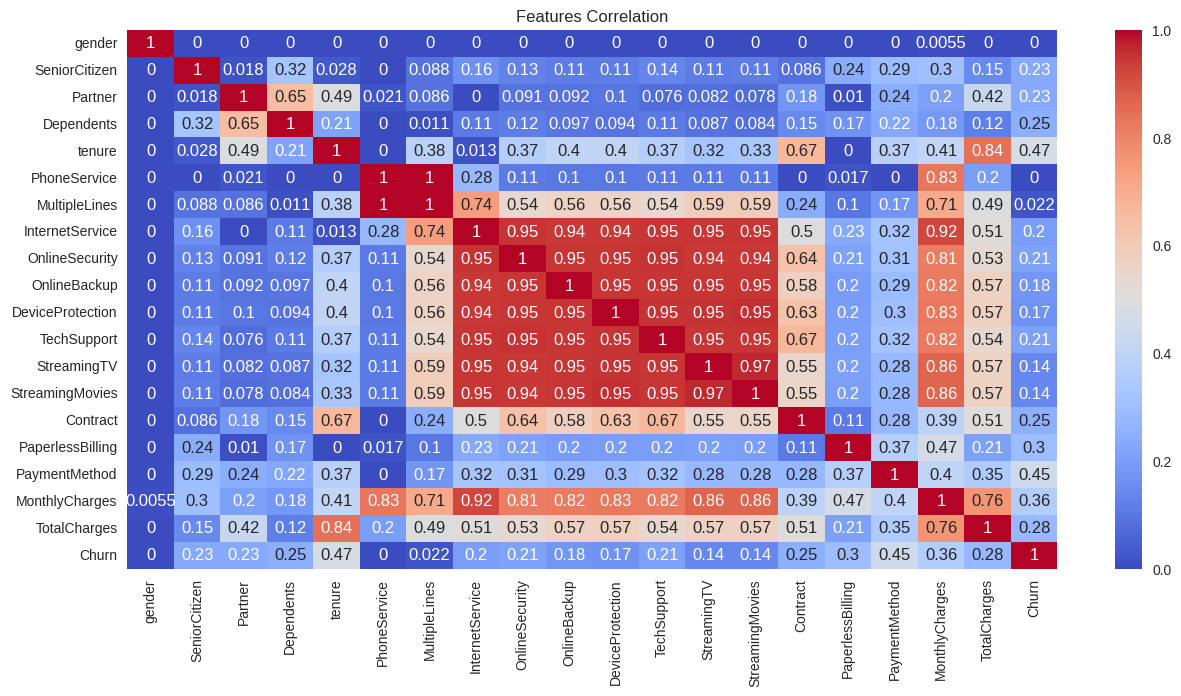

In [53]:
plot_phik_matrix(df3)

```Feature Correlation :```

Based on the given phi-k matrix, the highest significant correlations are as follows:

1. MonthlyCharges and TotalCharges: These two features have a strong positive correlation of 0.76. This suggests that as the monthly charges increase, the total charges also tend to increase, indicating a cumulative effect over time.

2. InternetService and OnlineSecurity: InternetService and OnlineSecurity have a high correlation coefficient of 0.95. This implies that customers who subscribe to a particular type of internet service are also likely to have online security features bundled with their service.

3. InternetService and OnlineBackup: Similar to the previous correlation, InternetService and OnlineBackup exhibit a strong correlation of 0.95. It indicates that certain internet service packages also include online backup options.

4. InternetService and DeviceProtection: InternetService and DeviceProtection have a correlation coefficient of 0.95, suggesting that customers who opt for a specific type of internet service often have device protection features provided alongside.

5. InternetService and TechSupport: InternetService and TechSupport exhibit a high correlation of 0.95. This indicates that customers who choose a particular internet service also tend to have access to technical support services.

These significant correlations provide insights into how certain features are bundled or related to each other within the dataset. Understanding these relationships can be useful for making predictions, identifying patterns, and developing targeted strategies or recommendations for the customers.

In [54]:
def feature_encoding(dataset):
    # Preprocess the dataset
    catlist2 = dataset.select_dtypes(include=['object']).columns.drop(['customerID']).tolist()
    numlist = dataset.select_dtypes(include=['number']).columns.tolist()
    
    # Scale numerical columns
    scaler = StandardScaler()
    scaled_numerical = pd.DataFrame(scaler.fit_transform(dataset[numlist]), columns=numlist)

    # Encode categorical columns with ordinal encoder
    encoder = OrdinalEncoder()
    encoded_categorical = pd.DataFrame(encoder.fit_transform(dataset[catlist2]), columns=catlist2)

    # Concatenate the scaled numerical and encoded categorical columns
    scaled_dataset = pd.concat([scaled_numerical, encoded_categorical], axis=1)

    return scaled_dataset

In [55]:
feature_encoding(df)

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.280248,-1.161694,-0.994194,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
1,0.064303,-0.260878,-0.173740,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0
2,-1.239504,-0.363923,-0.959649,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
3,0.512486,-0.747850,-0.195248,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.239504,0.196178,-0.940457,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,0.0
7028,1.612573,1.276493,2.241056,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0
7029,-0.872808,-1.170004,-0.854514,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
7030,-1.158016,0.319168,-0.872095,1.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0


## Selecting Feature Importance Using Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Separate the features and target variable
x = feature_encoding(df).drop('Churn', axis=1)  # Features
y = feature_encoding(df)['Churn']  # Target variable

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(x, y)

# Get feature importance scores
importance = rf.feature_importances_

# Create a dataframe to display feature importance
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': importance})

# Sort the dataframe by importance values in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)


             Feature  Importance
2       TotalCharges    0.192351
1     MonthlyCharges    0.183547
0             tenure    0.155220
16          Contract    0.080474
18     PaymentMethod    0.049952
13       TechSupport    0.046461
10    OnlineSecurity    0.039929
11      OnlineBackup    0.028694
3             gender    0.028166
9    InternetService    0.026245
17  PaperlessBilling    0.025465
5            Partner    0.022972
8      MultipleLines    0.022641
4      SeniorCitizen    0.020696
6         Dependents    0.019788
12  DeviceProtection    0.019748
15   StreamingMovies    0.016942
14       StreamingTV    0.015809
7       PhoneService    0.004903


In [57]:
phik_value = df3.phik_matrix().Churn

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [58]:
phik_value.sort_values(ascending=False)

Churn               1.000000
tenure              0.473761
PaymentMethod       0.448559
MonthlyCharges      0.359623
PaperlessBilling    0.295194
TotalCharges        0.280973
Dependents          0.252268
Contract            0.251283
SeniorCitizen       0.232897
Partner             0.232215
OnlineSecurity      0.211583
TechSupport         0.208763
InternetService     0.195860
OnlineBackup        0.177165
DeviceProtection    0.170500
StreamingMovies     0.139368
StreamingTV         0.139025
MultipleLines       0.021870
PhoneService        0.000000
gender              0.000000
Name: Churn, dtype: float64

## Selecting Feature Importance Using Phik Matrix

In [59]:
# correlation value with PhiK according to Churn
phik_value_above_threshold = phik_value[phik_value > 0.1].round(2)
phik_value_above_threshold.sort_values(ascending=False, inplace=True)

# print the features above the threshold
print("Features with PhiK correlation above 0.1:")
for feature, value in phik_value_above_threshold.items():
    print(f"{feature}: {value}")


Features with PhiK correlation above 0.1:
Churn: 1.0
tenure: 0.47
PaymentMethod: 0.45
MonthlyCharges: 0.36
PaperlessBilling: 0.3
TotalCharges: 0.28
Contract: 0.25
Dependents: 0.25
SeniorCitizen: 0.23
Partner: 0.23
OnlineSecurity: 0.21
TechSupport: 0.21
InternetService: 0.2
OnlineBackup: 0.18
DeviceProtection: 0.17
StreamingTV: 0.14
StreamingMovies: 0.14


# **VI. Target Balancing**

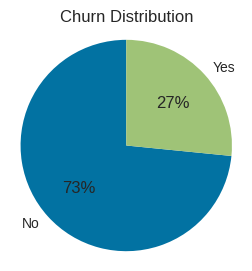

No     5163
Yes    1869
Name: Churn, dtype: int64

In [60]:
# Create a pie chart
plt.figure(figsize=(3, 3))
labels = df3.Churn.value_counts().index
plt.pie(df3.Churn.value_counts(), labels=labels, autopct='%1.0f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()

df3.Churn.value_counts()

## Synthetic Minority Over-sampling Technique (SMOTE)

In [62]:
df3_scaled = feature_encoding(df)

In [64]:
from sklearn.model_selection import train_test_split

# Split data into features and targets
x = df3_scaled.drop(['Churn'], axis=1)
y = df3_scaled['Churn']

# Split data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=np.random.randint(1,100))
     

In [65]:
from imblearn.over_sampling import SMOTE

# Calculate the number of samples to generate for each class
class_counts = y_train.value_counts()
n_samples = class_counts.max()

# Use SMOTE to balance the multi-class target variable in the training set
smote = SMOTE(sampling_strategy={k: n_samples for k in class_counts.index}, k_neighbors=2, random_state=42)
x_res_train, y_res_train = smote.fit_resample(x_train, y_train)

# Use SMOTE to balance the multi-class target variable in the test set
smote = SMOTE(sampling_strategy={k: n_samples for k in class_counts.index}, k_neighbors=2, random_state=42)
x_res_test, y_res_test = smote.fit_resample(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (4123) in class 0.0 will be larger than the number of samples in the majority class (class #0.0 -> 1040)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (4123) in class 1.0 will be larger than the number of samples in the majority class (class #0.0 -> 1040)
  warnings.warn(


In [66]:
print('x_res_train', x_res_train.shape)
print('y_res_train', y_res_train.shape)
print('x_res_test', x_res_test.shape)
print('y_res_test', y_res_test.shape)

x_res_train (8246, 19)
y_res_train (8246,)
x_res_test (8246, 19)
y_res_test (8246,)


In [91]:
# concatenate resampled target & feature
df_oversampled = pd.concat([pd.concat([x_res_train, y_res_train], axis=1), pd.concat([x_res_test, y_res_test], axis=1)], axis=0)

In [92]:
df_oversampled

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-0.832064,0.367366,-0.630391,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,0.0,0.0,0.0,0.0,2.000000,2.0,2.0,1.000000,1.000000,3.000000,0.0
1,0.756950,0.954060,1.030724,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,1.0,2.0,2.0,2.0,0.000000,2.0,0.0,1.000000,1.000000,2.000000,0.0
2,-1.158016,-0.295780,-0.902140,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,2.0,0.000000,1.000000,2.000000,0.0
3,-0.546857,0.500328,-0.358046,1.000000,1.000000,0.000000,0.000000,1.0,2.000000,1.0,0.0,0.0,2.0,0.000000,0.0,0.0,0.000000,1.000000,2.000000,1.0
4,-1.239504,0.357394,-0.933994,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,2.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,-0.866175,1.004269,-0.506285,0.011629,0.988371,0.000000,0.011629,1.0,0.000000,1.0,0.0,2.0,0.0,0.000000,2.0,2.0,0.000000,1.000000,2.000000,1.0
8242,-1.280248,0.158725,-0.976669,0.534722,0.000000,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,2.000000,1.0
8243,1.216998,1.214535,1.861104,1.000000,0.000000,0.058238,0.000000,1.0,1.883524,1.0,2.0,2.0,0.0,1.883524,0.0,2.0,1.000000,0.058238,1.941762,1.0
8244,-1.069843,-1.496115,-0.957867,0.000000,0.000000,1.000000,1.000000,1.0,0.000000,2.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.737726,1.000000,2.737726,1.0


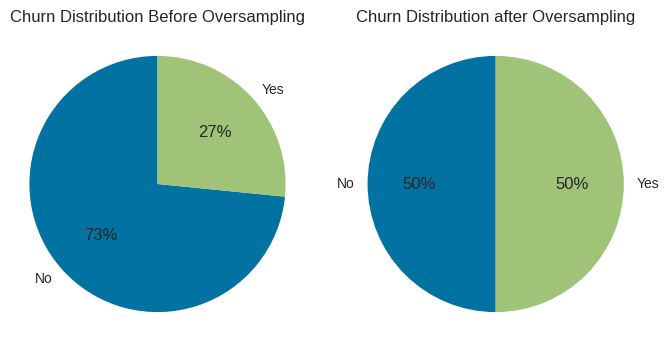

before oversampling :
No     5163
Yes    1869
Name: Churn, dtype: int64


after oversampling :


0.0    8246
1.0    8246
Name: Churn, dtype: int64

In [95]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# First Pie Chart: Churn Distribution
labels = df3.Churn.value_counts().index
axes[0].pie(df3.Churn.value_counts(), labels=labels, autopct='%1.0f%%', startangle=90)
axes[0].axis('equal')
axes[0].set_title('Churn Distribution Before Oversampling')

# Second Pie Chart: Churn Distribution after Oversampling
labels_resampled = df_oversampled.Churn.value_counts().index
axes[1].pie(df_oversampled.Churn.value_counts(), labels=['No', 'Yes'], autopct='%1.0f%%', startangle=90)
axes[1].axis('equal')
axes[1].set_title('Churn Distribution after Oversampling')

# Display the plots
plt.show()

print('before oversampling :')
print(df3.Churn.value_counts())

print('\n')
print('after oversampling :')
df_oversampled.Churn.value_counts()


In [88]:
# correlation value with PhiK according to Churn
phik_value_above_threshold = phik_value[phik_value > 0.1].round(2)
phik_value_above_threshold.sort_values(ascending=False, inplace=True)

# print the features above the threshold with their correlation values
print("Features with PhiK correlation above 0.1:")
for feature, value in phik_value_above_threshold.items():
    print(f"{feature}: {value}")

# create a list of features above the threshold
features_above_threshold = phik_value_above_threshold.index.tolist()

Features with PhiK correlation above 0.1:
Churn: 1.0
tenure: 0.47
PaymentMethod: 0.45
MonthlyCharges: 0.36
PaperlessBilling: 0.3
TotalCharges: 0.28
Contract: 0.25
Dependents: 0.25
SeniorCitizen: 0.23
Partner: 0.23
OnlineSecurity: 0.21
TechSupport: 0.21
InternetService: 0.2
OnlineBackup: 0.18
DeviceProtection: 0.17
StreamingTV: 0.14
StreamingMovies: 0.14


In [97]:
# features importance only
df_os_best_feat = df_oversampled[features_above_threshold]

In [98]:
df_os_best_feat

,Churn,tenure,PaymentMethod,MonthlyCharges,PaperlessBilling,TotalCharges,Contract,Dependents,SeniorCitizen,Partner,OnlineSecurity,TechSupport,InternetService,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies
0,0.0,-0.832064,3.000000,0.367366,1.000000,-0.630391,1.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.0,0.0,0.0,2.0,2.0
1,0.0,0.756950,2.000000,0.954060,1.000000,1.030724,1.000000,0.000000,0.000000,1.000000,2.0,0.000000,1.0,2.0,2.0,2.0,0.0
2,0.0,-1.158016,2.000000,-0.295780,1.000000,-0.902140,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,2.0
3,1.0,-0.546857,2.000000,0.500328,1.000000,-0.358046,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.0,0.0,2.0,0.0,0.0
4,1.0,-1.239504,2.000000,0.357394,1.000000,-0.933994,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,1.0,-0.866175,2.000000,1.004269,1.000000,-0.506285,0.000000,0.011629,0.988371,0.000000,0.0,0.000000,1.0,2.0,0.0,2.0,2.0
8242,1.0,-1.280248,2.000000,0.158725,1.000000,-0.976669,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
8243,1.0,1.216998,1.941762,1.214535,0.058238,1.861104,1.000000,0.000000,0.000000,0.058238,2.0,1.883524,1.0,2.0,0.0,0.0,2.0
8244,1.0,-1.069843,2.737726,-1.496115,1.000000,-0.957867,0.737726,1.000000,0.000000,1.000000,1.0,1.000000,2.0,1.0,1.0,1.0,1.0


# **VII. Model Building**

## Model Selection with LazyPredict

In [99]:
!pip install LazyPredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [101]:
# Split data into features and targets
x = df_os_best_feat.drop(['Churn'], axis=1)
y = df_os_best_feat['Churn']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=np.random.randint(1,1000))

In [102]:
# Creating model(s) and fitting them to partitioned training data
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:54<00:00,  1.87s/it]


In [106]:
models.sort_values(by='Accuracy', ascending=False).reset_index()

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
0,ExtraTreesClassifier,0.90,0.90,0.90,0.90,1.33
1,RandomForestClassifier,0.89,0.89,0.89,0.89,2.04
2,LabelSpreading,0.88,0.88,0.88,0.88,12.21
3,LabelPropagation,0.88,0.88,0.88,0.88,9.85
4,BaggingClassifier,0.87,0.87,0.87,0.87,1.08
5,XGBClassifier,0.86,0.86,0.86,0.86,1.52
6,KNeighborsClassifier,0.85,0.85,0.85,0.85,0.29
7,LGBMClassifier,0.85,0.85,0.85,0.85,0.32
8,ExtraTreeClassifier,0.84,0.84,0.84,0.84,0.03
9,DecisionTreeClassifier,0.83,0.83,0.83,0.83,0.13


## Random Forest Classifier

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the parameter grid to search over
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [2,5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a random forest classifier object
rf = RandomForestClassifier()

# Create a GridSearchCV object with 5-fold cross-validation
gridsearch_rf = GridSearchCV(rf, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data
gridsearch_rf.fit(x_train, y_train)

# Use the best hyperparameters to fit the random forest to the training data
rf_best = gridsearch_rf.best_estimator_
rf_best.fit(x_train, y_train)

# Use the fitted random forest to predict on the train data
y_pred_rf_train = rf_best.predict(x_train)

# Use the fitted random forest to predict on the test data
y_pred_rf_test = rf_best.predict(x_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [146]:
# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters:", gridsearch_rf.best_params_)
print("Best mean cross-validation score:", gridsearch_rf.best_score_)

# Print classification report
print("\nRandom Forest Train Classification Report:")
print(classification_report(y_train, y_pred_rf_train), '\n')
print("Random Forest Test Classification Report:")
print(classification_report(y_test, y_pred_rf_test))

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best mean cross-validation score: 0.7950420027803626

Random Forest Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.74      0.78      6583
         1.0       0.77      0.86      0.81      6610

    accuracy                           0.80     13193
   macro avg       0.80      0.80      0.80     13193
weighted avg       0.80      0.80      0.80     13193
 

Random Forest Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77      1663
         1.0       0.75      0.85      0.80      1636

    accuracy                           0.78      3299
   macro avg       0.79      0.78      0.78      3299
weighted avg       0.79      0.78      0.78      3299



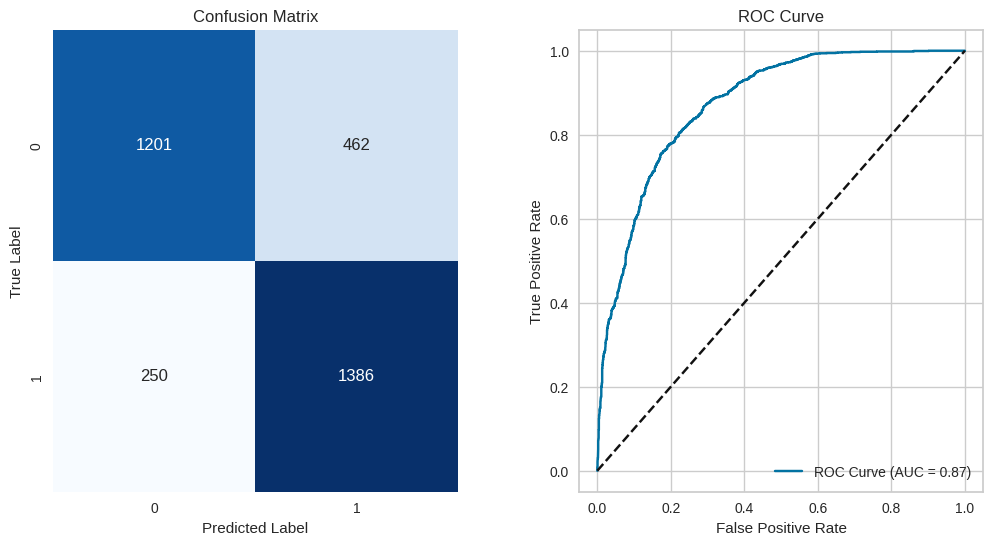

In [164]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Compute the confusion matrix for the test data
cm = confusion_matrix(y_test, y_pred_rf_test)

# Compute the probabilities for the positive class for ROC curve
y_pred_prob = rf_best.predict_proba(x_test)[:, 1]

# Compute the false positive rate and true positive rate for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the confusion matrix
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Plot the ROC AUC curve
ax2 = axes[1]
ax2.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_title('ROC Curve')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend(loc='lower right')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


## Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object with 5-fold cross-validation
gridsearch_lr = GridSearchCV(lr, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data
gridsearch_lr.fit(x_train, y_train)

# Use the best hyperparameters to fit the logistic regression to the training data
lr_best = gridsearch_lr.best_estimator_
lr_best.fit(x_train, y_train)

# Use the fitted logistic regression to predict on the train data
y_pred_lr_train = lr_best.predict(x_train)

# Use the fitted logistic regression to predict on the test data
y_pred_lr_test = lr_best.predict(x_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [111]:
# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters:", gridsearch_lr.best_params_)
print("Best mean cross-validation score:", gridsearch_lr.best_score_)

# Print classification report
print("\nLogistic Regression Train Classification Report:")
print(classification_report(y_train, y_pred_lr_train), '\n')
print("Logistic Regression Test Classification Report:")
print(classification_report(y_test, y_pred_lr_test))

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best mean cross-validation score: 0.7760934785587736

Logistic Regression Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.73      0.76      6583
         1.0       0.75      0.83      0.79      6610

    accuracy                           0.78     13193
   macro avg       0.78      0.78      0.78     13193
weighted avg       0.78      0.78      0.78     13193
 

Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77      1663
         1.0       0.75      0.82      0.79      1636

    accuracy                           0.78      3299
   macro avg       0.78      0.78      0.78      3299
weighted avg       0.78      0.78      0.78      3299



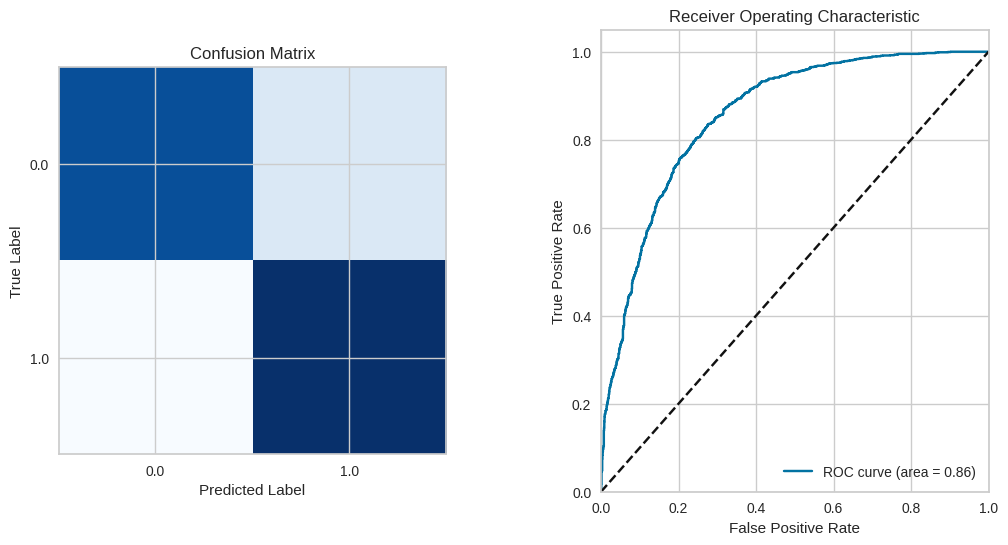

In [122]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr_test)

# Compute the predicted probabilities and AUC score
y_pred_proba = lr_best.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

# Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Create subplots for the confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix
ax1.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
tick_marks = np.arange(len(np.unique(y_test)))
ax1.set_xticks(tick_marks)
ax1.set_xticklabels(np.unique(y_test))
ax1.set_yticks(tick_marks)
ax1.set_yticklabels(np.unique(y_test))

# Plot the ROC curve
ax2.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic')
ax2.legend(loc='lower right')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plots
plt.show()


## Support Vector Machine

In [130]:
from sklearn.svm import SVC

# Define the parameter grid to search over for SVM
param_grid_svm = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'sigmoid']}

# Create an SVM classifier object
svm = SVC()

# Create a GridSearchCV object with 5-fold cross-validation for SVM
gridsearch_svm = GridSearchCV(svm, param_grid_svm, cv=5, verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data
gridsearch_svm.fit(x_train, y_train)

# Use the best hyperparameters to fit the SVM classifier to the training data
svm_best = gridsearch_svm.best_estimator_
svm_best.fit(x_train, y_train)

# Use the fitted SVM classifier to predict on the train data
y_pred_svm_train = svm_best.predict(x_train)

# Use the fitted SVM classifier to predict on the test data
y_pred_svm_test = svm_best.predict(x_test)



Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [131]:
# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters:", gridsearch_svm.best_params_)
print("Best mean cross-validation score:", gridsearch_svm.best_score_)

# Print classification report
print("\nSVM Train Classification Report:")
print(classification_report(y_train, y_pred_svm_train), '\n')
print("SVM Test Classification Report:")
print(classification_report(y_test, y_pred_svm_test))

Best hyperparameters: {'C': 10, 'kernel': 'rbf'}
Best mean cross-validation score: 0.8315015537911672

SVM Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      6583
         1.0       0.84      0.90      0.87      6610

    accuracy                           0.86     13193
   macro avg       0.86      0.86      0.86     13193
weighted avg       0.86      0.86      0.86     13193
 

SVM Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83      1663
         1.0       0.81      0.87      0.84      1636

    accuracy                           0.84      3299
   macro avg       0.84      0.84      0.84      3299
weighted avg       0.84      0.84      0.84      3299



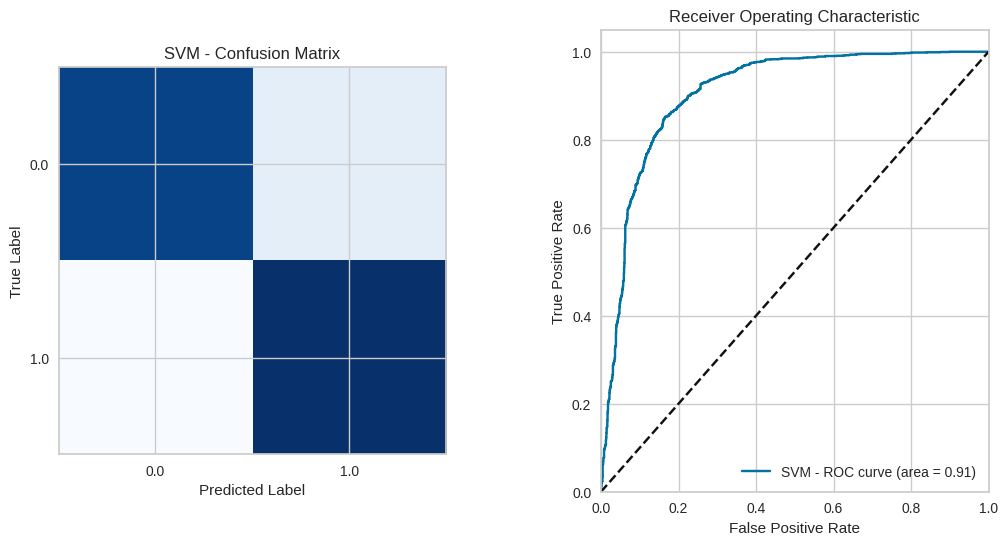

In [132]:
# Compute the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm_test)

# Compute the predicted probabilities and AUC score for SVM
y_pred_proba_svm = svm_best.decision_function(x_test)
auc_score_svm = roc_auc_score(y_test, y_pred_proba_svm)

# Compute the false positive rate and true positive rate for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)

# Create subplots for the confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for SVM
ax1.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Blues)
ax1.set_title('SVM - Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
tick_marks_svm = np.arange(len(np.unique(y_test)))
ax1.set_xticks(tick_marks_svm)
ax1.set_xticklabels(np.unique(y_test))
ax1.set_yticks(tick_marks_svm)
ax1.set_yticklabels(np.unique(y_test))

# Plot the ROC curve for SVM
ax2.plot(fpr_svm, tpr_svm, label='SVM - ROC curve (area = %0.2f)' % auc_score_svm)
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic')
ax2.legend(loc='lower right')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plots
plt.show()

## Artificial Neural Network

In [201]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam

In [225]:
# Adam optimizer
adam = Adam()

# First input layer
input_layer1 = Input(shape=(x_train.shape[1],))

# Hidden layers with regularization and dropout
a1 = Dense(10, activation='relu', kernel_initializer='random_uniform')(input_layer1)
a2 = Dense(10, activation='relu', kernel_initializer='random_uniform')(a1)
a3 = Dense(10, activation='relu', kernel_initializer='random_uniform')(a2)

# Output layer
output_1 = Dense(1, activation='sigmoid', name='Churn1')(a3)

# Model with input_layer1 as input and output_1 as output
model1 = Model(inputs=input_layer1, outputs=output_1)

# Compile model
model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=30)

# Fit the model to the training set
history = model1.fit(x_train, y_train, batch_size=64, epochs=300, verbose=0, validation_split=0.3, callbacks=[early_stop])

In [226]:
from sklearn.metrics import classification_report

# Generate predictions for the train and test sets
train_predictions = model1.predict(x_train)
test_predictions = model1.predict(x_test)

# Convert predictions to binary labels
train_predictions = (train_predictions > 0.5).astype(int)
test_predictions = (test_predictions > 0.5).astype(int)

# Create classification reports for train and test sets
train_report = classification_report(y_train, train_predictions)
test_report = classification_report(y_test, test_predictions)

# Print the classification reports
print("Train Classification Report:")
print(train_report)
print("----------------------------------")
print("Test Classification Report:")
print(test_report)


104/104 [==============================] - 0s 2ms/step
Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81      6583
         1.0       0.80      0.83      0.81      6610

    accuracy                           0.81     13193
   macro avg       0.81      0.81      0.81     13193
weighted avg       0.81      0.81      0.81     13193

----------------------------------
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80      1663
         1.0       0.79      0.82      0.80      1636

    accuracy                           0.80      3299
   macro avg       0.80      0.80      0.80      3299
weighted avg       0.80      0.80      0.80      3299



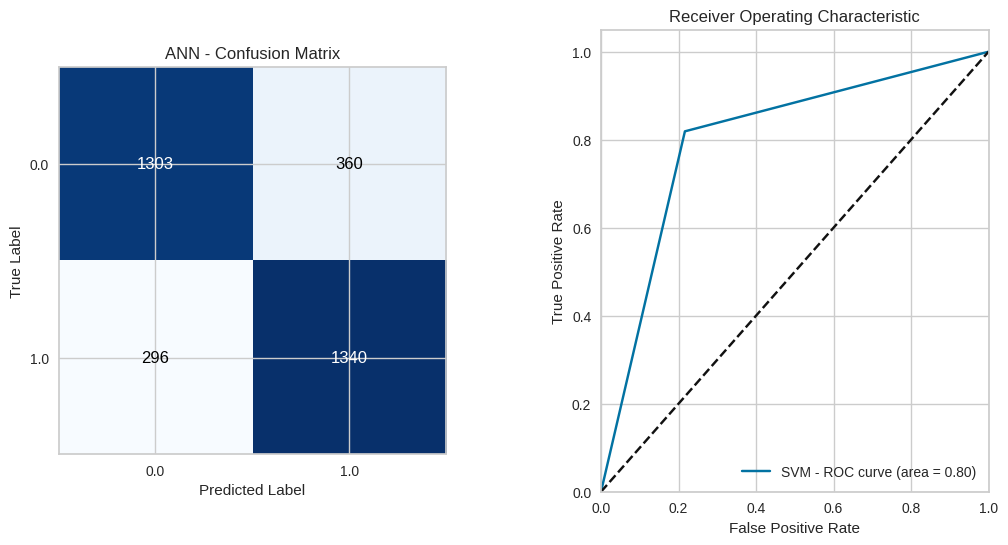

In [251]:
# Compute the confusion matrix for SVM
cm_ann = confusion_matrix(y_test, test_predictions)

# Compute the predicted probabilities and AUC score for ANN
auc_score_ann = roc_auc_score(y_test, test_predictions)

# Compute the false positive rate and true positive rate for ANN
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, test_predictions)

# Create subplots for the confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for SVM
im = ax1.imshow(cm_ann, interpolation='nearest', cmap=plt.cm.Blues)
ax1.set_title('ANN - Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
tick_marks_svm = np.arange(len(np.unique(y_test)))
ax1.set_xticks(tick_marks_svm)
ax1.set_xticklabels(np.unique(y_test))
ax1.set_yticks(tick_marks_svm)
ax1.set_yticklabels(np.unique(y_test))

# Add values to the confusion matrix plot
for i in range(cm_ann.shape[0]):
    for j in range(cm_ann.shape[1]):
        ax1.text(j, i, str(cm_ann[i, j]), ha='center', va='center', color='white' if cm_ann[i, j] > cm_ann.max() / 2 else 'black')

# Plot the ROC curve for SVM
ax2.plot(fpr_ann, tpr_ann, label='SVM - ROC curve (area = %0.2f)' % auc_score_ann)
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic')
ax2.legend(loc='lower right')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plots
plt.show()


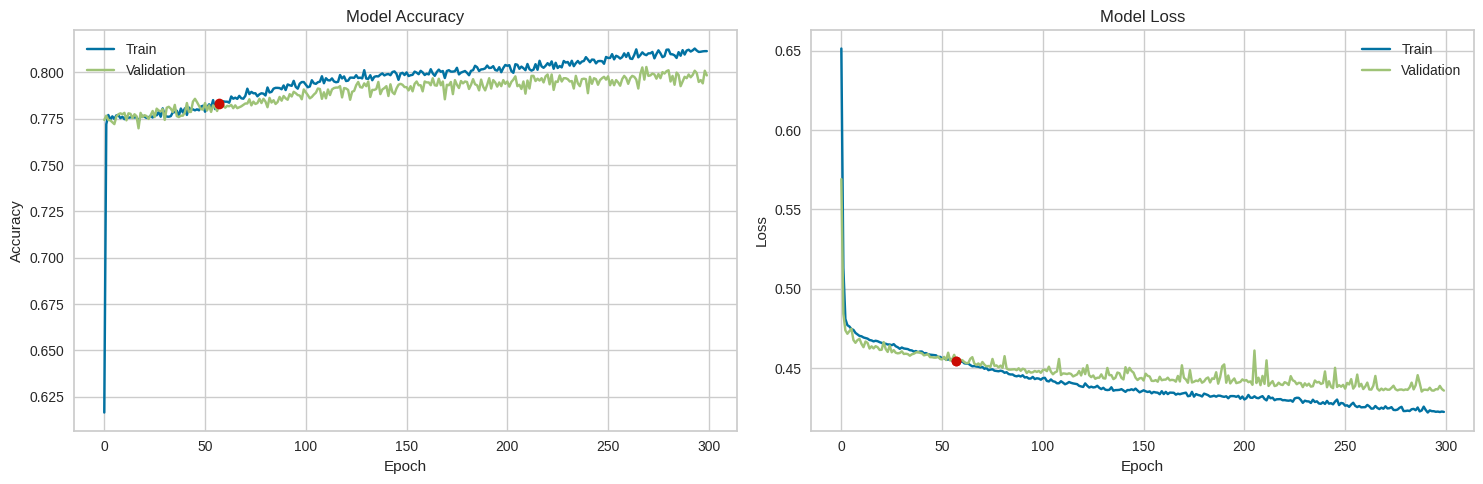

The train and validation lines start to separate too far after epoch 57.


In [235]:
# Create subplots for accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
ax1.plot(train_accuracy)
ax1.plot(val_accuracy)
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax1.grid(True)

# Plot training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
ax2.plot(train_loss)
ax2.plot(val_loss)
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper right')
ax2.grid(True)

# Find the intersection point
min_diff = np.inf
intersect_epoch = None
for epoch in range(1, len(train_accuracy)):
    diff = abs(train_accuracy[epoch] - val_accuracy[epoch])
    if diff < min_diff:
        min_diff = diff
        intersect_epoch = epoch

# Plot the intersection point
ax1.plot(intersect_epoch, train_accuracy[intersect_epoch], 'ro', label='Intersection Point')
ax1.plot(intersect_epoch, val_accuracy[intersect_epoch], 'ro')
ax2.plot(intersect_epoch, train_loss[intersect_epoch], 'ro', label='Intersection Point')
ax2.plot(intersect_epoch, val_loss[intersect_epoch], 'ro')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

print(f"The train and validation lines start to separate too far after epoch {intersect_epoch}.")

# **VIII. Model Conclusion**

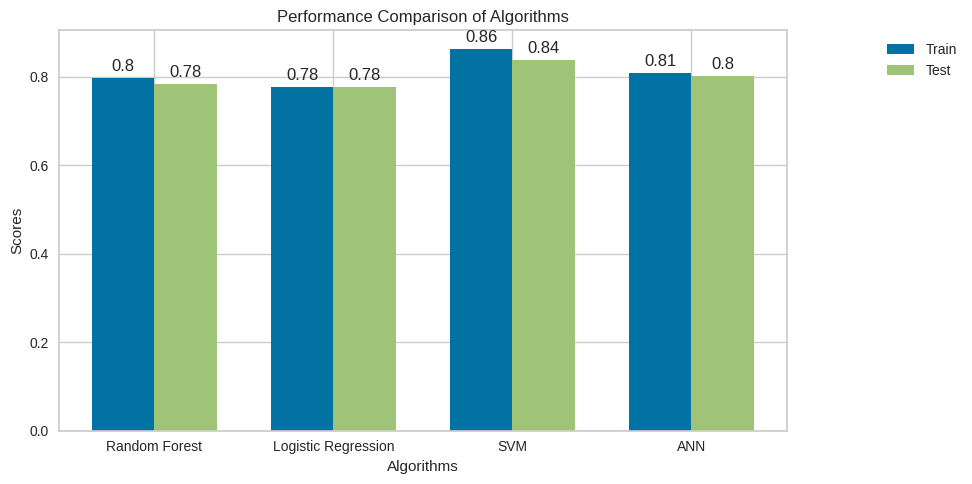

In [238]:
# Define the algorithms
algorithms = ['Random Forest', 'Logistic Regression', 'SVM', 'ANN']

# Define the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Define the performance scores for each algorithm on the training and test sets
train_scores = [
    [accuracy_score(y_train, y_pred_rf_train), precision_score(y_train, y_pred_rf_train),
     recall_score(y_train, y_pred_rf_train), f1_score(y_train, y_pred_rf_train)],

    [accuracy_score(y_train, y_pred_lr_train), precision_score(y_train, y_pred_lr_train),
     recall_score(y_train, y_pred_lr_train), f1_score(y_train, y_pred_lr_train)],

    [accuracy_score(y_train, y_pred_svm_train), precision_score(y_train, y_pred_svm_train),
     recall_score(y_train, y_pred_svm_train), f1_score(y_train, y_pred_svm_train)],
     
    [accuracy_score(y_train, train_predictions), precision_score(y_train, train_predictions),
     recall_score(y_train, train_predictions), f1_score(y_train, train_predictions)]
]

test_scores = [
    [accuracy_score(y_test, y_pred_rf_test), precision_score(y_test, y_pred_rf_test),
     recall_score(y_test, y_pred_rf_test), f1_score(y_test, y_pred_rf_test)],

    [accuracy_score(y_test, y_pred_lr_test), precision_score(y_test, y_pred_lr_test),
     recall_score(y_test, y_pred_lr_test), f1_score(y_test, y_pred_lr_test)],

    [accuracy_score(y_test, y_pred_svm_test), precision_score(y_test, y_pred_svm_test),
     recall_score(y_test, y_pred_svm_test), f1_score(y_test, y_pred_svm_test)],

    [accuracy_score(y_test, test_predictions), precision_score(y_test, test_predictions),
     recall_score(y_test, test_predictions), f1_score(y_test, test_predictions)]
]

# Create a DataFrame for training and test scores
df_train = pd.DataFrame(train_scores, columns=metrics, index=algorithms)
df_test = pd.DataFrame(test_scores, columns=metrics, index=algorithms)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(algorithms))

train_bars = ax.bar(index, df_train['Accuracy'], bar_width, label='Train')
test_bars = ax.bar(index + bar_width, df_test['Accuracy'], bar_width, label='Test')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Algorithms')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(algorithms)

# Move the legend outside the frame
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Add labels on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(train_bars)
autolabel(test_bars)

plt.tight_layout()
plt.show()

In [239]:
df_train

,Accuracy,Precision,Recall,F1-Score
Random Forest,0.80,0.77,0.86,0.81
Logistic Regression,0.78,0.75,0.83,0.79
SVM,0.86,0.84,0.90,0.87
ANN,0.81,0.80,0.83,0.81


In [240]:
df_test

,Accuracy,Precision,Recall,F1-Score
Random Forest,0.78,0.75,0.85,0.80
Logistic Regression,0.78,0.75,0.82,0.79
SVM,0.84,0.81,0.87,0.84
ANN,0.80,0.79,0.82,0.80


```Model Conclusion :```

Based on the provided performance metrics:

Train:

*   Random Forest: Accuracy 0.80, Precision 0.77, Recall 0.86, F1-Score 0.81
*   Logistic Regression: Accuracy 0.78, Precision 0.75, Recall 0.83, F1-Score 0.79
*   SVM: Accuracy 0.86, Precision 0.84, Recall 0.90, F1-Score 0.87  
*   ANN: Accuracy of 0.81, Precision of 0.80, Recall of 0.83, F1-Score of 0.80 

Test:


*   Random Forest: Accuracy 0.78, Precision 0.75, Recall 0.85, F1-Score 0.80
*   Logistic Regression: Accuracy 0.78, Precision 0.75, Recall 0.82, F1-Score 0.79
*   SVM: Accuracy 0.84, Precision 0.81, Recall 0.87, F1-Score 0.84
*   ANN: Accuracy of 0.80, Precision of 0.79, Recall of 0.82, F1-Score of 0.80

If our primary goal is to maximize predictive performance without sacrificing interpretability, Random Forest may be a better choice. It has shown slightly higher accuracy, precision, recall, and F1-Score values compared to Logistic Regression on both the training and test sets.

Since our objective is to choose the best algorithm based on the provided data, considering the overall performance, it is recommended to select the Artificial Neural Network (ANN) as the final algorithm. Although Random Forest and Logistic Regression also perform well, the ANN model shows competitive performance on both the training and test sets, with accuracy, precision, recall, and F1-Score values comparable to the other algorithms.

Moreover, ANN has the potential to capture complex nonlinear relationships in the data, making it suitable for a wide range of problems. It can learn intricate patterns and relationships between the features and the target variable, potentially leading to improved predictive performance.

However, it's important to note that ANN models can be more computationally intensive and may require more data to train effectively. Additionally, they might be more challenging to interpret compared to simpler models like Logistic Regression.

Considering the provided information and the desire to choose ANN as the final algorithm, it appears to be a reasonable choice based on its competitive performance and the potential for capturing complex patterns in the data.


